In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import scipy as sc
import sklearn as sk
import math
from math import pi

np.random.seed(42)

In [2]:
home = os.getcwd()
print(os.listdir(home))

['.git', '.gitignore', '.ipynb_checkpoints', '01-08-19-V118', '01-08-19-V118_ch1.big', '01-08-19-V118_ch1.dat', '01-08-19-V118_ch2.big', '01-08-19-V118_ch2.dat', '03-05-19-V118', '03-05-19_ch1.big', '03-05-19_ch1.dat', '03-05-19_ch2.big', '03-05-19_ch2.dat', '03-26-19-V118', '03-26-19_ch1.big', '03-26-19_ch1.dat', '03-26-19_ch2.big', '03-26-19_ch2.dat', '08-14-18-V118', '08-14-18-V118_ch1.big', '08-14-18-V118_ch1.dat', '08-14-18-V118_ch2.big', '08-14-18-V118_ch2.dat', 'checkpoint.pth', 'Consolidated Snooper Log for Test train 6-188 - Mar. 5.xlsx', 'data_prep.ipynb', 'data_prep_development.ipynb', 'data_prep_final.ipynb', 'EDA.ipynb', 'EDA2.ipynb', 'eda2_b.ipynb', 'EDA3.ipynb', 'gps_files', 'gps_inclusion.ipynb', 'July 6, 2020 Vehicle 118 Expo Line Test Train Data.xlsx', 'M-Line and EVGL.zip', 'NN_training.nn', 'NN_training_big.nn', 'NN_training_short.nn', 'RE Location of accelerometer for vibration measurements.pdf', 'REC0001_ch1.big', 'REC0001_ch1.dat', 'REC0001_ch2.big', 'REC0001_ch2

In [3]:
df = pd.read_csv("03-05-19_ch1.big", index_col = 0)
print(df.info())
print(df.describe())
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11668 entries, 0 to 11667
Columns: 260 entries, 0 to max_acc
dtypes: float64(260)
memory usage: 23.2 MB
None
                  0            10            20            30            40  \
count  11668.000000  11668.000000  11668.000000  11668.000000  11668.000000   
mean       0.004403      0.003355      0.006235      0.006826      0.007878   
std        0.007131      0.004474      0.007873      0.009240      0.009886   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.001335      0.000388      0.000266      0.000218      0.000187   
50%        0.002101      0.002338      0.003978      0.004222      0.005392   
75%        0.004229      0.004762      0.009345      0.009447      0.011176   
max        0.184814      0.201660      0.186462      0.175359      0.135228   

                 50            60            70            80            90  \
count  11668.000000  11668.000000  11668.000000  1

,0,10,20,30,40,50,60,70,80,90,...,2500,2510,2520,2530,2540,2550,mean_acc,median,95_acc,max_acc
0,0.001609,0.000450,0.000286,0.000167,0.000151,0.000127,0.000106,0.000109,0.000107,0.000076,...,0.000022,0.000015,0.000018,0.000016,0.000016,0.000023,0.007904,0.006931,0.018558,0.028211
1,0.001758,0.000274,0.000251,0.000161,0.000157,0.000120,0.000110,0.000095,0.000075,0.000086,...,0.000019,0.000015,0.000020,0.000016,0.000024,0.000014,0.008869,0.008714,0.017975,0.027030
2,0.001389,0.000288,0.000171,0.000158,0.000107,0.000118,0.000092,0.000096,0.000092,0.000101,...,0.000021,0.000023,0.000019,0.000014,0.000016,0.000011,0.007368,0.006656,0.016424,0.025582
3,0.001315,0.000237,0.000181,0.000144,0.000134,0.000138,0.000081,0.000129,0.000068,0.000075,...,0.000022,0.000017,0.000018,0.000014,0.000025,0.000015,0.006382,0.005798,0.014314,0.023695
4,0.001686,0.000267,0.000198,0.000187,0.000127,0.000233,0.000238,0.000104,0.000084,0.000131,...,0.000017,0.000017,0.000014,0.000017,0.000021,0.000017,0.007763,0.007311,0.016251,0.028942


In [4]:
df2 = pd.read_csv("03-05-19_ch2.big", index_col = 0)
print(df2.info())
print(df2.describe())
df2.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11668 entries, 0 to 11667
Columns: 260 entries, 0 to max_acc
dtypes: float64(260)
memory usage: 23.2 MB
None
                  0            10            20            30            40  \
count  11668.000000  11668.000000  11668.000000  11668.000000  11668.000000   
mean       0.006027      0.003447      0.006167      0.006484      0.006478   
std        0.015934      0.004923      0.007598      0.008516      0.008696   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.001187      0.000337      0.000237      0.000197      0.000165   
50%        0.001877      0.002131      0.003930      0.004119      0.004314   
75%        0.003855      0.004340      0.009202      0.008934      0.008730   
max        0.149253      0.061420      0.091031      0.101162      0.101506   

                 50            60            70            80            90  \
count  11668.000000  11668.000000  11668.000000  1

,0,10,20,30,40,50,60,70,80,90,...,2500,2510,2520,2530,2540,2550,mean_acc,median,95_acc,max_acc
0,0.001049,0.000281,0.000186,0.000108,0.000109,0.000183,0.000105,0.000106,0.000072,0.000076,...,0.000021,0.000013,0.000014,0.000017,0.000015,0.000028,0.006499,0.005735,0.014936,0.021827
1,0.000717,0.000300,0.000199,0.000126,0.000114,0.000174,0.000081,0.000105,0.000071,0.000086,...,0.000013,0.000017,0.000016,0.000022,0.000014,0.000018,0.003935,0.003335,0.009474,0.018177
2,0.000850,0.000286,0.000169,0.000133,0.000115,0.000093,0.000108,0.000098,0.000075,0.000055,...,0.000017,0.000022,0.000015,0.000015,0.000018,0.000016,0.005013,0.004526,0.011205,0.017957
3,0.001075,0.000295,0.000178,0.000136,0.000151,0.000175,0.000108,0.000106,0.000066,0.000054,...,0.000016,0.000018,0.000018,0.000022,0.000017,0.000018,0.005484,0.004502,0.013789,0.021666
4,0.001526,0.000398,0.000216,0.000175,0.000146,0.000145,0.000204,0.000101,0.000109,0.000163,...,0.000018,0.000017,0.000016,0.000016,0.000022,0.000018,0.007443,0.006522,0.018230,0.033521


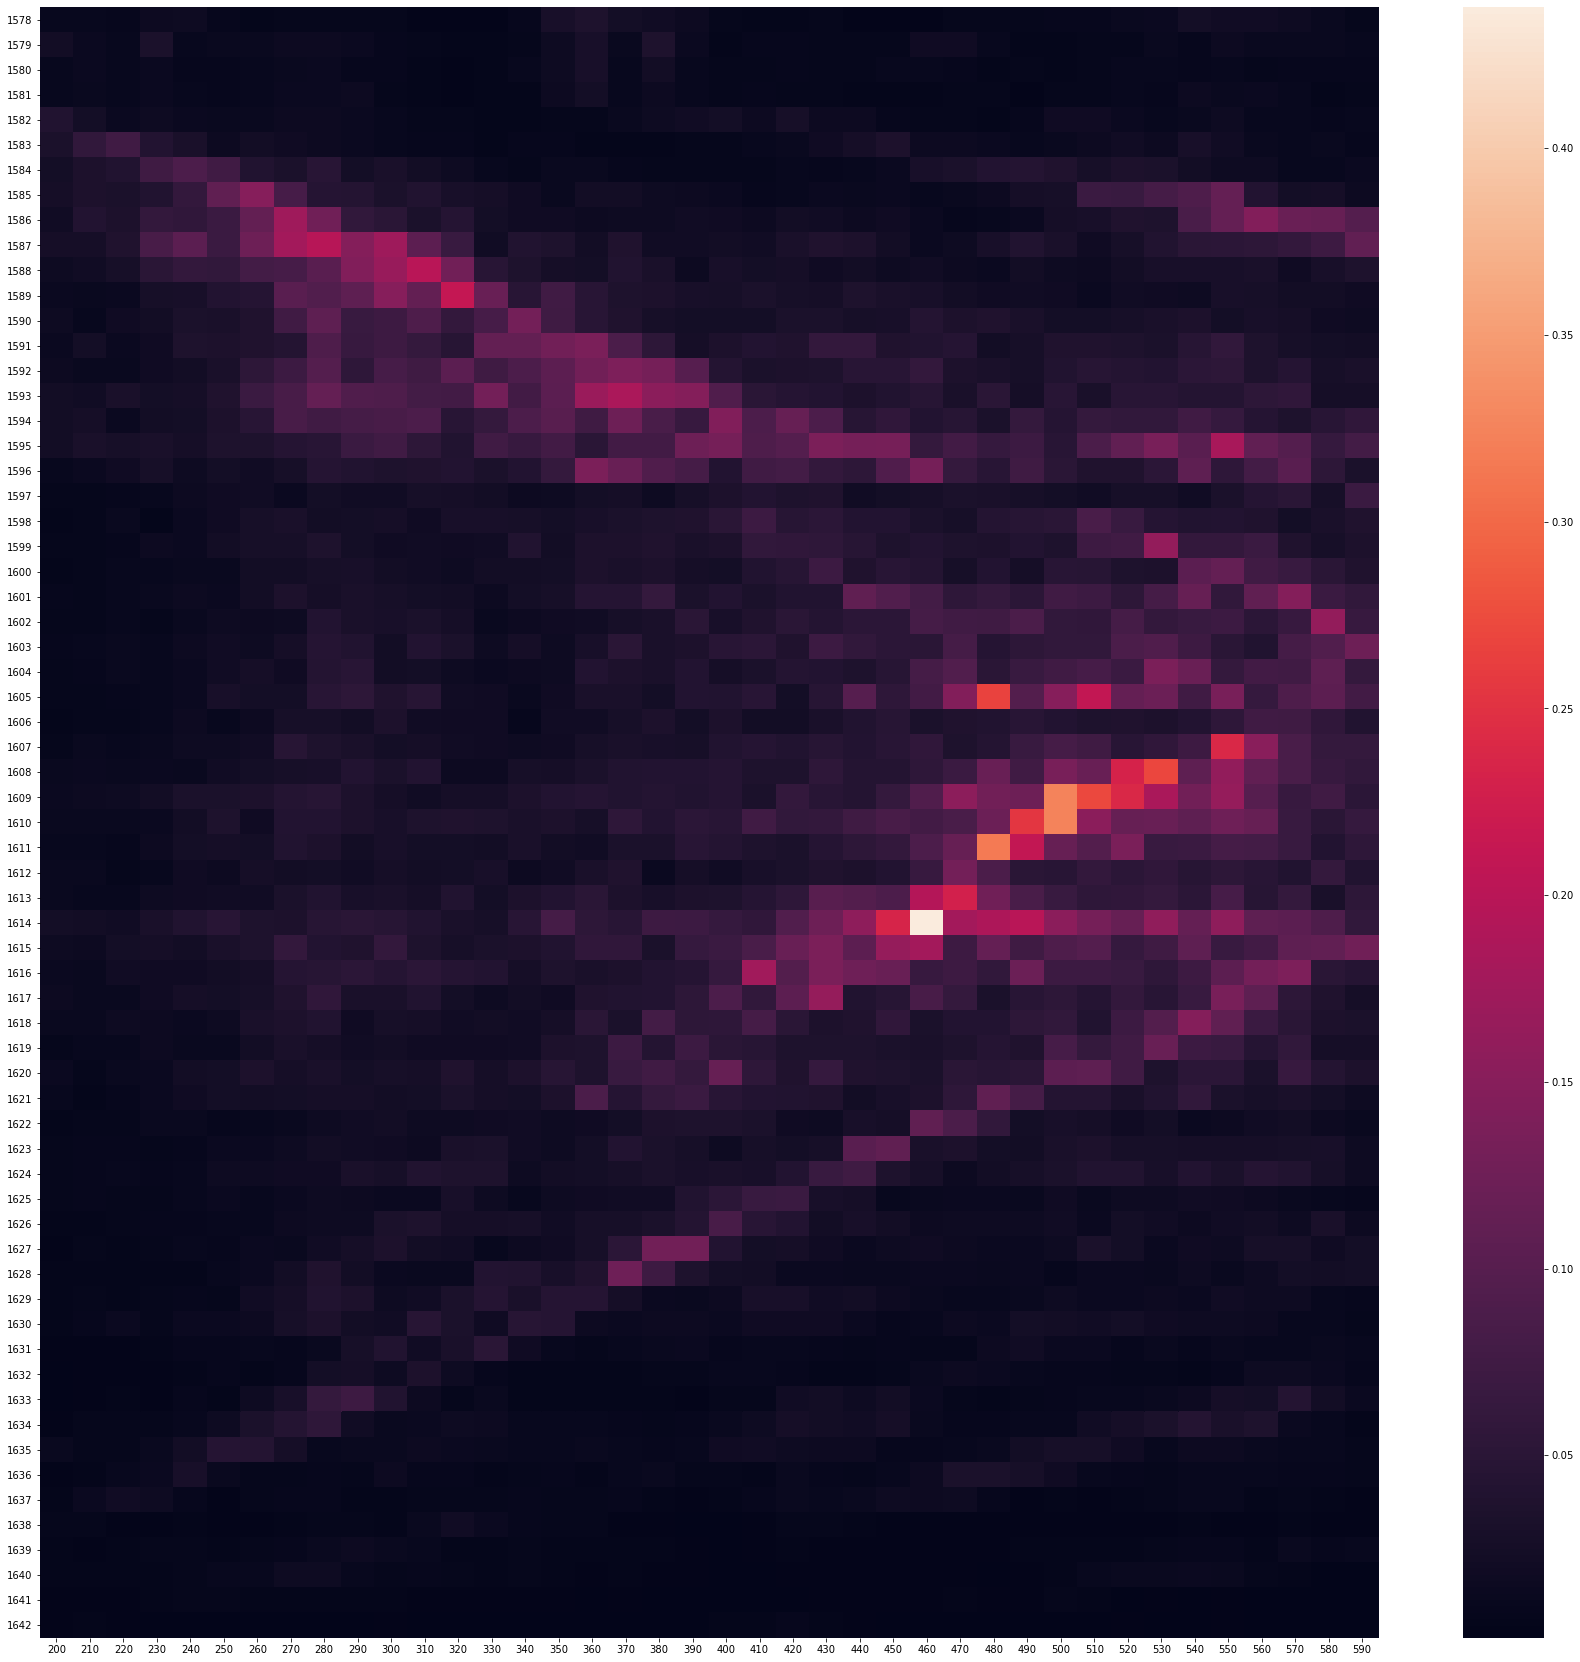

In [5]:
plt.figure(figsize=(30,30))
# sb.heatmap(df2.iloc[1578:1643, 20:60], vmax = 0.3)
sb.heatmap(df2.iloc[1578:1643, 20:60])
plt.show()

In [6]:
df3 = pd.read_csv(".\\gps_files\\05-03-2019.gps", sep =" ", header = None)
df3.head()

,0,1,2,3,4,5,6,7,8
0,304,0.0,0.0,0.0,0.0,000'00′00.0'E,00'00′00.0'N,0.0,13
1,313,0.0,0.0,0.0,0.0,000'00′00.0'E,00'00′00.0'N,0.0,13
2,320,0.0,0.0,0.0,0.0,000'00′00.0'E,00'00′00.0'N,0.0,13
3,326,0.0,0.0,0.0,0.0,000'00′00.0'E,00'00′00.0'N,0.0,13
4,330,0.0,0.0,0.0,0.0,000'00′00.0'E,00'00′00.0'N,0.0,13


In [7]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49337 entries, 0 to 49336
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       49337 non-null  int64  
 1   1       49337 non-null  float64
 2   2       49337 non-null  float64
 3   3       49337 non-null  float64
 4   4       49337 non-null  float64
 5   5       49337 non-null  object 
 6   6       49337 non-null  object 
 7   7       49337 non-null  float64
 8   8       49337 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 3.4+ MB


In [8]:
#will not work near equator or greenwich median/int dat line
df3["lat"] = df3.iloc[:,6].apply(lambda x: int(x[0:2]) + float(x[3:5])/60 + float(x[6:10])/3600)
df3["long"] = df3.iloc[:,5].apply(lambda x: int(x[0:3]) + float(x[4:6])/60 + float(x[7:11])/3600)
df3["alt"] = df3.iloc[:,7]
df3["time"] = df3.iloc[:,0]
df3.tail()

,0,1,2,3,4,5,6,7,8,lat,long,alt,time
49332,11665078,0.03,15.29,86.55,0.18,122'57′20.3'W,49'12′20.2'N,69.9,13,49.205611,122.955639,69.9,11665078
49333,11665132,0.03,15.29,86.55,0.18,122'57′20.3'W,49'12′20.2'N,69.9,13,49.205611,122.955639,69.9,11665132
49334,11665591,0.02,15.29,86.55,0.18,122'57′20.3'W,49'12′20.2'N,69.9,13,49.205611,122.955639,69.9,11665591
49335,11665657,0.02,15.29,86.55,0.18,122'57′20.3'W,49'12′20.2'N,69.9,13,49.205611,122.955639,69.9,11665657
49336,11666079,0.02,15.29,86.55,0.18,122'57′20.3'W,49'12′20.2'N,69.7,13,49.205611,122.955639,69.7,11666079


In [9]:
# curvature of the earth constants used to define the wgs84 elipsoid
a = 6378137
f = 1/298.257223563
b = a*(1-f)
e = ((a**2 - b**2)/a**2)**0.5
eprime = ((a**2 - b**2)/b**2)**0.5

def xyz(phi,lam,h):
    phi = phi*pi/180
    lam = lam*pi/180
    N = a/((1-((e**2)*math.sin(phi)**2))**.5)

    X = (N + h)*math.cos(phi)*math.cos(lam)
    Y = (N + h)*math.cos(phi)*math.sin(lam)
    Z = (((b**2/a**2)*N) +h)*math.sin(phi)
    return(X,Y,Z)

In [10]:
# ax, ay, az = xyz(49.198728, 122.939937, 0) 
# bx, by, bz = xyz(49.196295, 122.946954, 0)
ax, ay, az = xyz(10.0, 12.0, 0) 
bx, by, bz = xyz(10.0, 12.1, 0)
dxyz = ((ax- bx) **2 +(ay-by)**2 + (az-bz)**2) ** 0.5
print(dxyz)

10963.93501522996


In [11]:
df3[["xx", "yy", "zz"]] = df3.apply(lambda x: xyz(x.lat, x.long, x.alt), axis=1, result_type="expand")

In [12]:
len(df3)

49337

In [13]:
disp = [0]
for i in range(len(df3)):
    try:
        disp.append(((df3.xx[i] -df3.xx[i-1])**2 + (df3.yy[i] - df3.yy[i-1])**2 + (df3.zz[i] - df3.zz[i-1])**2) **0.5)
    except:
        print("failed on:", i)
     

failed on: 0


In [14]:
len(disp)
df3.long = df3.long.apply(lambda x: -x)

<AxesSubplot:xlabel='long', ylabel='lat'>

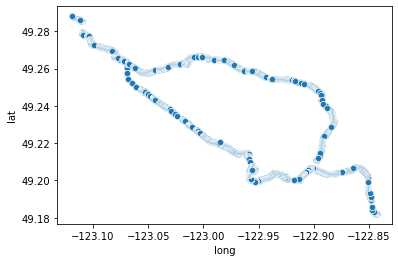

In [15]:
sb.scatterplot(x="long", y="lat", data = df3.loc[(df3.lat > 0)&(df3.long < 0)])

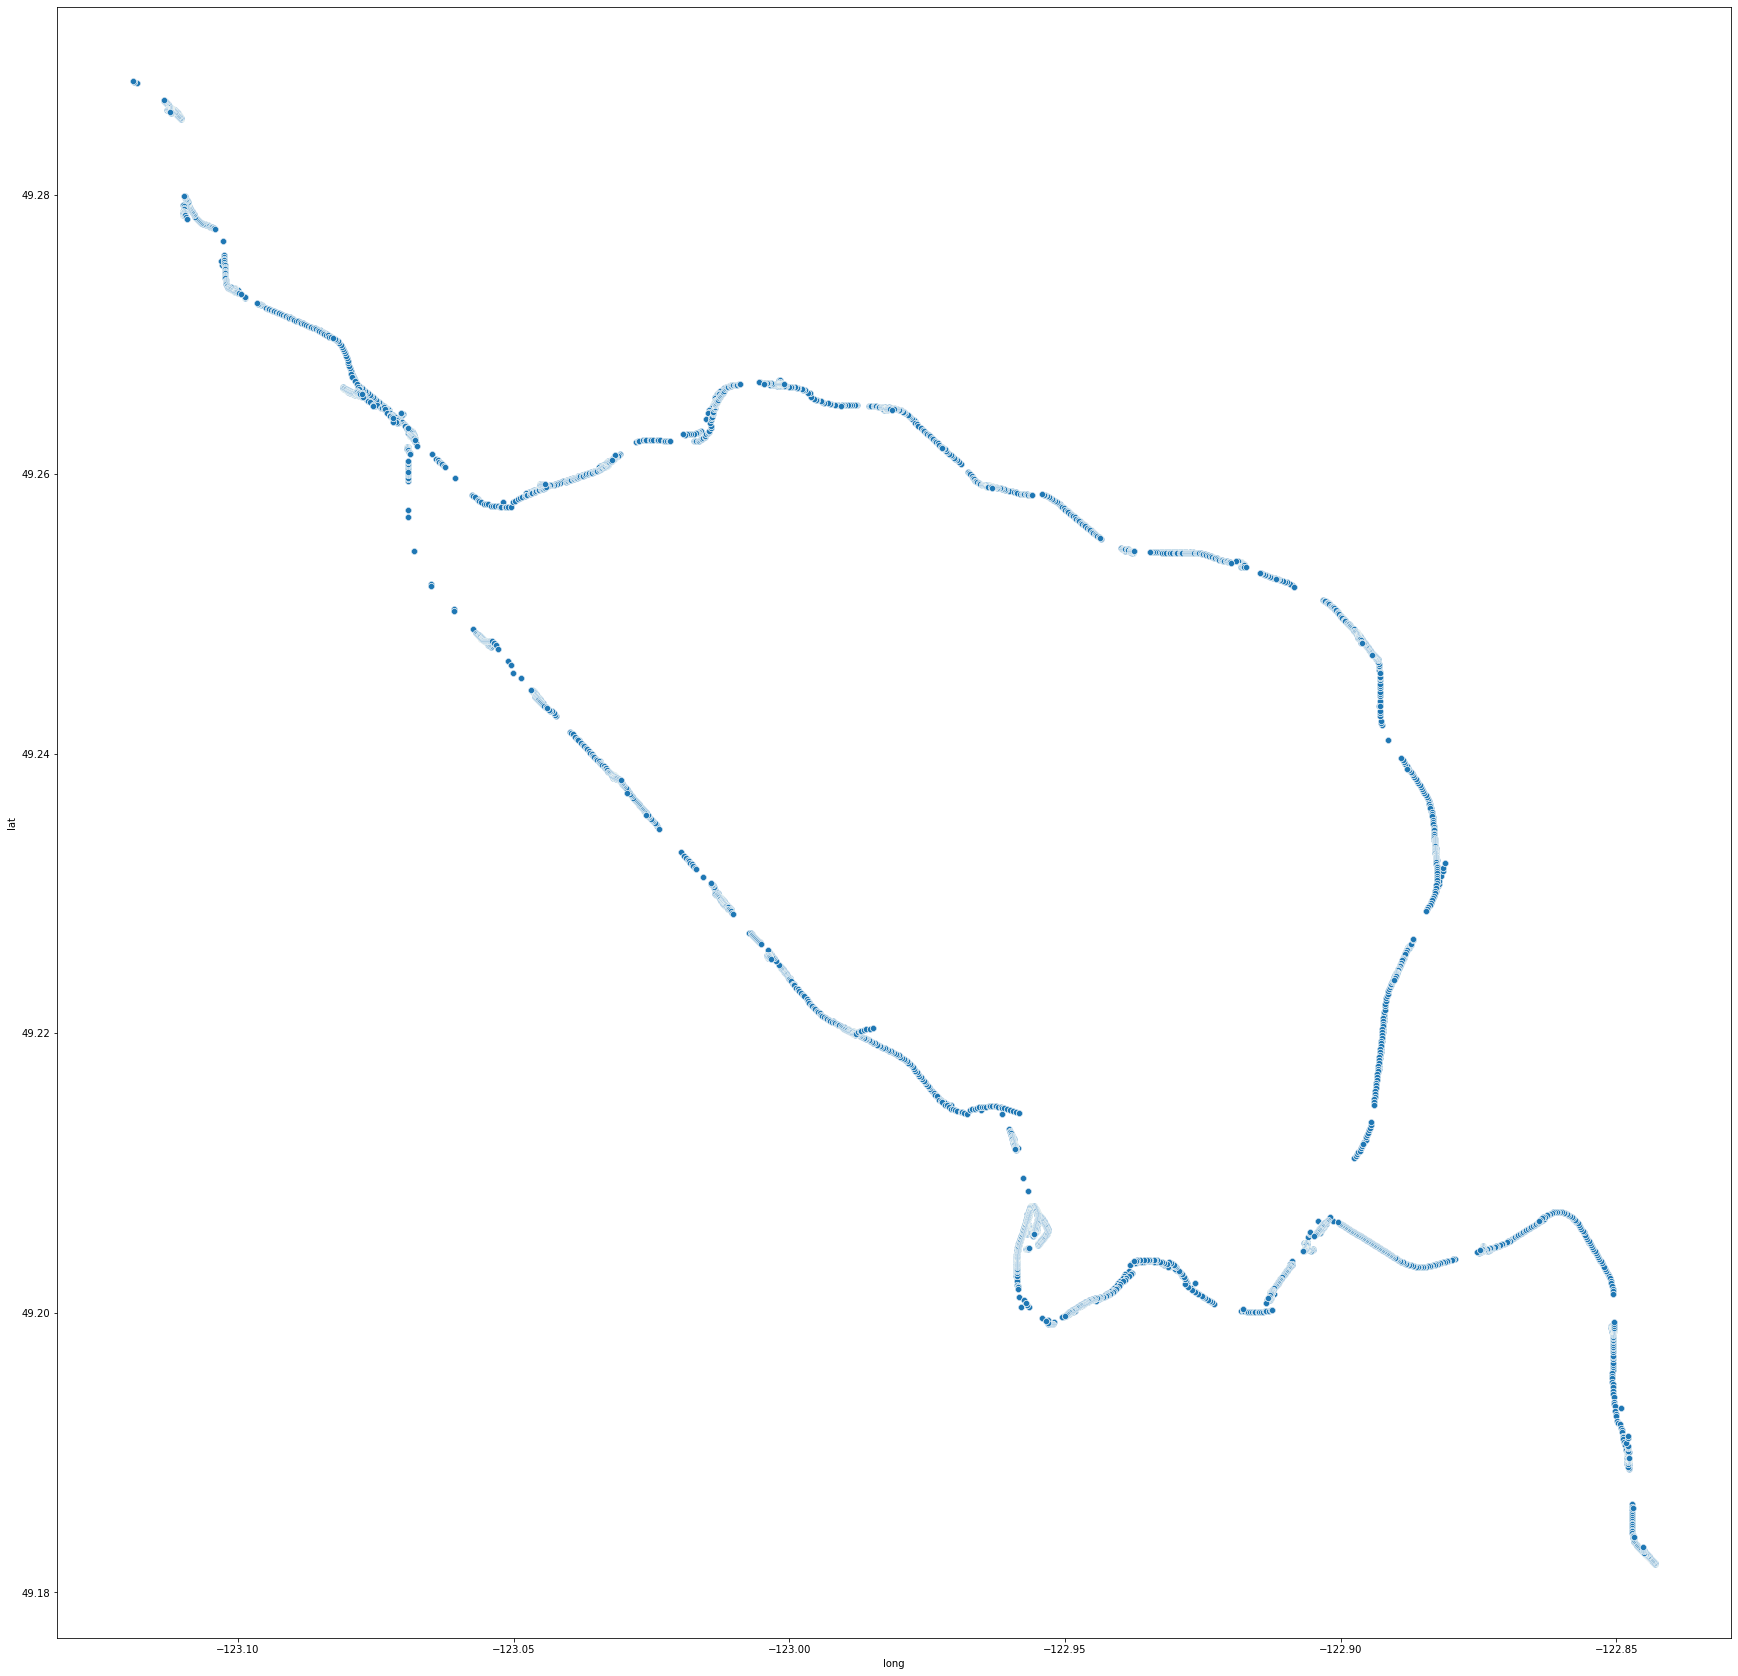

In [16]:
plt.figure(figsize=(30,30))
sb.scatterplot(x="long", y="lat", data = df3.loc[(df3.lat > 0)&(df3.long < 0)])
plt.show()


In [17]:
df3["disp"] = disp

In [18]:
vels = [0]
for i in np.arange(1, len(df3)):
    vels.append(df3.disp[i] / (df3.time[i] - df3.time[i-1]) * 3600)

In [19]:
df3["vel"] = vels
df3 = df3.drop([0, 1,2,3, 4, 5,6,7,8], axis = 1)

In [20]:
df3.head(20)

,lat,long,alt,time,xx,yy,zz,disp,vel
0,0.000000,-0.000000,0.0,304,6.378137e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,0.000000,-0.000000,0.0,313,6.378137e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,0.000000,-0.000000,0.0,320,6.378137e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,0.000000,-0.000000,0.0,326,6.378137e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,0.000000,-0.000000,0.0,330,6.378137e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
5,0.000000,-0.000000,0.0,334,6.378137e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
6,0.000000,-0.000000,0.0,339,6.378137e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
7,0.000000,-0.000000,0.0,347,6.378137e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
8,0.000000,-0.000000,0.0,351,6.378137e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
9,49.204556,-122.957028,0.0,358,-2.271371e+06,3.503355e+06,4.805453e+06,1.049666e+07,5.398282e+09


In [21]:
df3.tail()

,lat,long,alt,time,xx,yy,zz,disp,vel
49332,49.205611,-122.955639,69.9,11665078,-2.271263e+06,3.503374e+06,4.805582e+06,0.2,1.585903
49333,49.205611,-122.955639,69.9,11665132,-2.271263e+06,3.503374e+06,4.805582e+06,0.0,0.000000
49334,49.205611,-122.955639,69.9,11665591,-2.271263e+06,3.503374e+06,4.805582e+06,0.0,0.000000
49335,49.205611,-122.955639,69.9,11665657,-2.271263e+06,3.503374e+06,4.805582e+06,0.0,0.000000
49336,49.205611,-122.955639,69.7,11666079,-2.271263e+06,3.503374e+06,4.805582e+06,0.2,1.706161


In [22]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49337 entries, 0 to 49336
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   lat     49337 non-null  float64
 1   long    49337 non-null  float64
 2   alt     49337 non-null  float64
 3   time    49337 non-null  int64  
 4   xx      49337 non-null  float64
 5   yy      49337 non-null  float64
 6   zz      49337 non-null  float64
 7   disp    49337 non-null  float64
 8   vel     49337 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 3.4 MB


In [23]:
df3.describe()

,lat,long,alt,time,xx,yy,zz,disp,vel
count,49337.000000,49337.000000,49337.000000,4.933700e+04,4.933700e+04,4.933700e+04,4.933700e+04,4.933700e+04,4.933700e+04
mean,31.325567,-78.247722,35.748193,5.874012e+06,8.745995e+05,2.227587e+06,3.058946e+06,2.270029e+05,1.870820e+06
std,23.683548,59.158825,40.113727,3.326987e+06,4.160925e+06,1.684160e+06,2.312701e+06,1.526821e+06,2.713899e+07
min,0.000000,-123.119000,-96.300000,3.040000e+02,-2.277427e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000,-122.976389,0.000000,3.044551e+06,-2.271333e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,49.204861,-122.909500,19.500000,5.857602e+06,-2.267951e+06,3.496387e+06,4.805531e+06,0.000000e+00,0.000000e+00
75%,49.247056,-0.000000,71.300000,8.741866e+06,6.378137e+06,3.503294e+06,4.808574e+06,1.000000e-01,7.377049e-01
max,49.288111,-0.000000,161.100000,1.166608e+07,6.378295e+06,3.509509e+06,4.811533e+06,1.050035e+07,5.398282e+09


In [24]:
df3_back = df3.copy()
len(df3.loc[df3.vel > 0]) / len(df3) * 100

26.031173358736854

In [25]:
tot_time = (df3.time.max() - df3.time.min()) / 1000

In [26]:
tot_min = tot_time / 60

In [27]:
tot_min

194.42958333333334

In [28]:
df1 = df.reset_index()
df2 = df2.reset_index()

In [29]:
df2.head()

,index,0,10,20,30,40,50,60,70,80,...,2500,2510,2520,2530,2540,2550,mean_acc,median,95_acc,max_acc
0,0,0.001049,0.000281,0.000186,0.000108,0.000109,0.000183,0.000105,0.000106,0.000072,...,0.000021,0.000013,0.000014,0.000017,0.000015,0.000028,0.006499,0.005735,0.014936,0.021827
1,1,0.000717,0.000300,0.000199,0.000126,0.000114,0.000174,0.000081,0.000105,0.000071,...,0.000013,0.000017,0.000016,0.000022,0.000014,0.000018,0.003935,0.003335,0.009474,0.018177
2,2,0.000850,0.000286,0.000169,0.000133,0.000115,0.000093,0.000108,0.000098,0.000075,...,0.000017,0.000022,0.000015,0.000015,0.000018,0.000016,0.005013,0.004526,0.011205,0.017957
3,3,0.001075,0.000295,0.000178,0.000136,0.000151,0.000175,0.000108,0.000106,0.000066,...,0.000016,0.000018,0.000018,0.000022,0.000017,0.000018,0.005484,0.004502,0.013789,0.021666
4,4,0.001526,0.000398,0.000216,0.000175,0.000146,0.000145,0.000204,0.000101,0.000109,...,0.000018,0.000017,0.000016,0.000016,0.000022,0.000018,0.007443,0.006522,0.018230,0.033521


In [30]:
df1.head()

,index,0,10,20,30,40,50,60,70,80,...,2500,2510,2520,2530,2540,2550,mean_acc,median,95_acc,max_acc
0,0,0.001609,0.000450,0.000286,0.000167,0.000151,0.000127,0.000106,0.000109,0.000107,...,0.000022,0.000015,0.000018,0.000016,0.000016,0.000023,0.007904,0.006931,0.018558,0.028211
1,1,0.001758,0.000274,0.000251,0.000161,0.000157,0.000120,0.000110,0.000095,0.000075,...,0.000019,0.000015,0.000020,0.000016,0.000024,0.000014,0.008869,0.008714,0.017975,0.027030
2,2,0.001389,0.000288,0.000171,0.000158,0.000107,0.000118,0.000092,0.000096,0.000092,...,0.000021,0.000023,0.000019,0.000014,0.000016,0.000011,0.007368,0.006656,0.016424,0.025582
3,3,0.001315,0.000237,0.000181,0.000144,0.000134,0.000138,0.000081,0.000129,0.000068,...,0.000022,0.000017,0.000018,0.000014,0.000025,0.000015,0.006382,0.005798,0.014314,0.023695
4,4,0.001686,0.000267,0.000198,0.000187,0.000127,0.000233,0.000238,0.000104,0.000084,...,0.000017,0.000017,0.000014,0.000017,0.000021,0.000017,0.007763,0.007311,0.016251,0.028942


In [31]:
df = pd.merge(df1, df2, how = "outer", on = "index")
df.head()

,index,0_x,10_x,20_x,30_x,40_x,50_x,60_x,70_x,80_x,...,2500_y,2510_y,2520_y,2530_y,2540_y,2550_y,mean_acc_y,median_y,95_acc_y,max_acc_y
0,0,0.001609,0.000450,0.000286,0.000167,0.000151,0.000127,0.000106,0.000109,0.000107,...,0.000021,0.000013,0.000014,0.000017,0.000015,0.000028,0.006499,0.005735,0.014936,0.021827
1,1,0.001758,0.000274,0.000251,0.000161,0.000157,0.000120,0.000110,0.000095,0.000075,...,0.000013,0.000017,0.000016,0.000022,0.000014,0.000018,0.003935,0.003335,0.009474,0.018177
2,2,0.001389,0.000288,0.000171,0.000158,0.000107,0.000118,0.000092,0.000096,0.000092,...,0.000017,0.000022,0.000015,0.000015,0.000018,0.000016,0.005013,0.004526,0.011205,0.017957
3,3,0.001315,0.000237,0.000181,0.000144,0.000134,0.000138,0.000081,0.000129,0.000068,...,0.000016,0.000018,0.000018,0.000022,0.000017,0.000018,0.005484,0.004502,0.013789,0.021666
4,4,0.001686,0.000267,0.000198,0.000187,0.000127,0.000233,0.000238,0.000104,0.000084,...,0.000018,0.000017,0.000016,0.000016,0.000022,0.000018,0.007443,0.006522,0.018230,0.033521


In [32]:
df.rename(columns={'index':'time'}, inplace=True)
df.time = df.time.apply(lambda x: x*1000)

In [33]:
df.head()

,time,0_x,10_x,20_x,30_x,40_x,50_x,60_x,70_x,80_x,...,2500_y,2510_y,2520_y,2530_y,2540_y,2550_y,mean_acc_y,median_y,95_acc_y,max_acc_y
0,0,0.001609,0.000450,0.000286,0.000167,0.000151,0.000127,0.000106,0.000109,0.000107,...,0.000021,0.000013,0.000014,0.000017,0.000015,0.000028,0.006499,0.005735,0.014936,0.021827
1,1000,0.001758,0.000274,0.000251,0.000161,0.000157,0.000120,0.000110,0.000095,0.000075,...,0.000013,0.000017,0.000016,0.000022,0.000014,0.000018,0.003935,0.003335,0.009474,0.018177
2,2000,0.001389,0.000288,0.000171,0.000158,0.000107,0.000118,0.000092,0.000096,0.000092,...,0.000017,0.000022,0.000015,0.000015,0.000018,0.000016,0.005013,0.004526,0.011205,0.017957
3,3000,0.001315,0.000237,0.000181,0.000144,0.000134,0.000138,0.000081,0.000129,0.000068,...,0.000016,0.000018,0.000018,0.000022,0.000017,0.000018,0.005484,0.004502,0.013789,0.021666
4,4000,0.001686,0.000267,0.000198,0.000187,0.000127,0.000233,0.000238,0.000104,0.000084,...,0.000018,0.000017,0.000016,0.000016,0.000022,0.000018,0.007443,0.006522,0.018230,0.033521


In [34]:
# df3.time = df3.time.apply(lambda x: x/1000)
def bin_vel(x):
    if x > 1:
        return(1)
    else:
        return(0)
df3["b_vel"] = df3.vel.apply(bin_vel)
df3.tail()

,lat,long,alt,time,xx,yy,zz,disp,vel,b_vel
49332,49.205611,-122.955639,69.9,11665078,-2.271263e+06,3.503374e+06,4.805582e+06,0.2,1.585903,1
49333,49.205611,-122.955639,69.9,11665132,-2.271263e+06,3.503374e+06,4.805582e+06,0.0,0.000000,0
49334,49.205611,-122.955639,69.9,11665591,-2.271263e+06,3.503374e+06,4.805582e+06,0.0,0.000000,0
49335,49.205611,-122.955639,69.9,11665657,-2.271263e+06,3.503374e+06,4.805582e+06,0.0,0.000000,0
49336,49.205611,-122.955639,69.7,11666079,-2.271263e+06,3.503374e+06,4.805582e+06,0.2,1.706161,1


In [35]:
df3["time_s"] = df3.time.apply(lambda x: x/1000)
df3["disp_km"] = df3.disp.apply(lambda x: x/1000)
df3.head(15)
ave = df3.loc[(df3.long <0)&(df3.lat > 0 )]
ave.head()
ave = ave.reset_index()
ave = ave.drop(columns="index")
ave.head()

,lat,long,alt,time,xx,yy,zz,disp,vel,b_vel,time_s,disp_km
0,49.204556,-122.957028,0.0,358,-2.271371e+06,3.503355e+06,4.805453e+06,1.049666e+07,5.398282e+09,1,0.358,10496.659911
1,49.204556,-122.957028,0.0,363,-2.271371e+06,3.503355e+06,4.805453e+06,0.000000e+00,0.000000e+00,0,0.363,0.000000
2,49.204556,-122.957028,72.5,374,-2.271397e+06,3.503395e+06,4.805508e+06,7.250000e+01,2.372727e+04,1,0.374,0.072500
3,49.204556,-122.957028,72.5,378,-2.271397e+06,3.503395e+06,4.805508e+06,0.000000e+00,0.000000e+00,0,0.378,0.000000
4,49.204556,-122.957028,72.5,385,-2.271397e+06,3.503395e+06,4.805508e+06,0.000000e+00,0.000000e+00,0,0.385,0.000000


In [36]:
sm_vel = [0]
for i in np.arange(1,len(ave) -1):
    vel_sum = ave.vel[i - 1] + ave.vel[i] + ave.vel[i + 1]
    vel_ave = vel_sum / 3
    sm_vel.append(vel_ave)
sm_vel.append(0)

In [37]:
ave["sm_vel"] = sm_vel
ave.head()

,lat,long,alt,time,xx,yy,zz,disp,vel,b_vel,time_s,disp_km,sm_vel
0,49.204556,-122.957028,0.0,358,-2.271371e+06,3.503355e+06,4.805453e+06,1.049666e+07,5.398282e+09,1,0.358,10496.659911,0.000000e+00
1,49.204556,-122.957028,0.0,363,-2.271371e+06,3.503355e+06,4.805453e+06,0.000000e+00,0.000000e+00,0,0.363,0.000000,1.799435e+09
2,49.204556,-122.957028,72.5,374,-2.271397e+06,3.503395e+06,4.805508e+06,7.250000e+01,2.372727e+04,1,0.374,0.072500,7.909091e+03
3,49.204556,-122.957028,72.5,378,-2.271397e+06,3.503395e+06,4.805508e+06,0.000000e+00,0.000000e+00,0,0.378,0.000000,7.909091e+03
4,49.204556,-122.957028,72.5,385,-2.271397e+06,3.503395e+06,4.805508e+06,0.000000e+00,0.000000e+00,0,0.385,0.000000,0.000000e+00


In [38]:
ave.sm_vel.value_counts()

0.000000      5745
0.251046        15
0.244898        14
0.250522        12
0.251046        12
              ... 
1.276596         1
69.222886        1
31.555742        1
10.159531        1
410.207185       1
Name: sm_vel, Length: 19397, dtype: int64

In [39]:
ave.b_vel.loc[ave.sm_vel < 1] = 1
ave.b_vel.loc[ave.sm_vel >= 1] = 0

C:\ProgramData\Anaconda3\envs\PyTorch_37\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\envs\PyTorch_37\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [40]:
gps_time_int = 1000
buckets =  np.arange(0, ave.time.max() + gps_time_int, gps_time_int)
rev_ave = pd.DataFrame(buckets)
rev_ave.columns = ["time"]
xs = []
ys = []
zs = []
for i in np.arange(1, len(buckets)):
    xmean = ave.loc[(ave.time < buckets[i]) & (ave.time >= buckets[i - 1]), "xx"].mean()
    xs.append(xmean)
    ymean = ave.loc[(ave.time < buckets[i]) & (ave.time >= buckets[i - 1]), "yy"].mean()
    ys.append(ymean)
    zmean = ave.loc[(ave.time < buckets[i]) & (ave.time >= buckets[i - 1]), "zz"].mean()
    zs.append(zmean)
xs.append(np.nan)
ys.append(np.nan)
zs.append(np.nan)
rev_ave["xx"] = xs
rev_ave["yy"] = ys
rev_ave["zz"] = zs

In [41]:
rev_ave = pd.DataFrame(buckets)
rev_ave.columns = ["time"]
xs = []
ys = []
zs = []
for i in np.arange(1, len(buckets)):
    xmean = ave.loc[(ave.time < buckets[i]) & (ave.time >= buckets[i - 1]), "xx"].mean()
    xs.append(xmean)
    ymean = ave.loc[(ave.time < buckets[i]) & (ave.time >= buckets[i - 1]), "yy"].mean()
    ys.append(ymean)
    zmean = ave.loc[(ave.time < buckets[i]) & (ave.time >= buckets[i - 1]), "zz"].mean()
    zs.append(zmean)
xs.append(np.nan)
ys.append(np.nan)
zs.append(np.nan)


In [42]:
len(xs)
rev_ave["xx"] = xs
rev_ave["yy"] = ys
rev_ave["zz"] = zs


In [43]:
rev_ave.head()
disp = [0]
for i in range(len(rev_ave)):
    try:
        disp.append(((rev_ave.xx[i] -rev_ave.xx[i-1])**2 + (rev_ave.yy[i] - rev_ave.yy[i-1])**2 + (rev_ave.zz[i] - rev_ave.zz[i-1])**2) **0.5)
    except:
        print("failed on:", i)
rev_ave["dist"] = disp

failed on: 0


In [44]:
vels = [0]
for i in np.arange(1, len(rev_ave)):
    vels.append(rev_ave.dist[i] / (rev_ave.time[i] - rev_ave.time[i-1]) * 3600)
rev_ave["speed"] = vels
rev_ave.head()

,time,xx,yy,zz,dist,speed
0,0,-2.271396e+06,3.503393e+06,4.805505e+06,0.000000,0.000000
1,1000,-2.271373e+06,3.503399e+06,4.805516e+06,26.139403,94.101850
2,2000,-2.271255e+06,3.503371e+06,4.805581e+06,137.242717,494.073782
3,3000,-2.271253e+06,3.503370e+06,4.805582e+06,2.588961,9.320260
4,4000,-2.271252e+06,3.503370e+06,4.805581e+06,0.839797,3.023271


In [45]:
rev_ave.describe()

,time,xx,yy,zz,dist,speed
count,1.166800e+04,8.402000e+03,8.402000e+03,8.402000e+03,8097.000000,8097.000000
mean,5.833500e+06,-2.271118e+06,3.500929e+06,4.807394e+06,9.738851,35.059865
std,3.368406e+06,3.548994e+03,4.626610e+03,2.091126e+03,17.134853,61.685472
min,0.000000e+00,-2.277427e+06,3.491034e+06,4.803884e+06,0.000000,0.000000
25%,2.916750e+06,-2.273791e+06,3.496894e+06,4.805550e+06,0.450000,1.620000
50%,5.833500e+06,-2.271258e+06,3.502787e+06,4.806901e+06,3.594583,12.940498
75%,8.750250e+06,-2.268289e+06,3.504018e+06,4.809549e+06,11.757918,42.328506
max,1.166700e+07,-2.265006e+06,3.509509e+06,4.811533e+06,181.238809,652.459712


In [46]:
rev_ave["b_vel"] = np.nan
rev_ave.loc[rev_ave.speed < 3.6, "b_vel"] = 0
rev_ave.loc[rev_ave.speed >= 3.6, "b_vel"] = 1
rev_ave.describe()

,time,xx,yy,zz,dist,speed,b_vel
count,1.166800e+04,8.402000e+03,8.402000e+03,8.402000e+03,8097.000000,8097.000000,8097.000000
mean,5.833500e+06,-2.271118e+06,3.500929e+06,4.807394e+06,9.738851,35.059865,0.715327
std,3.368406e+06,3.548994e+03,4.626610e+03,2.091126e+03,17.134853,61.685472,0.451287
min,0.000000e+00,-2.277427e+06,3.491034e+06,4.803884e+06,0.000000,0.000000,0.000000
25%,2.916750e+06,-2.273791e+06,3.496894e+06,4.805550e+06,0.450000,1.620000,0.000000
50%,5.833500e+06,-2.271258e+06,3.502787e+06,4.806901e+06,3.594583,12.940498,1.000000
75%,8.750250e+06,-2.268289e+06,3.504018e+06,4.809549e+06,11.757918,42.328506,1.000000
max,1.166700e+07,-2.265006e+06,3.509509e+06,4.811533e+06,181.238809,652.459712,1.000000


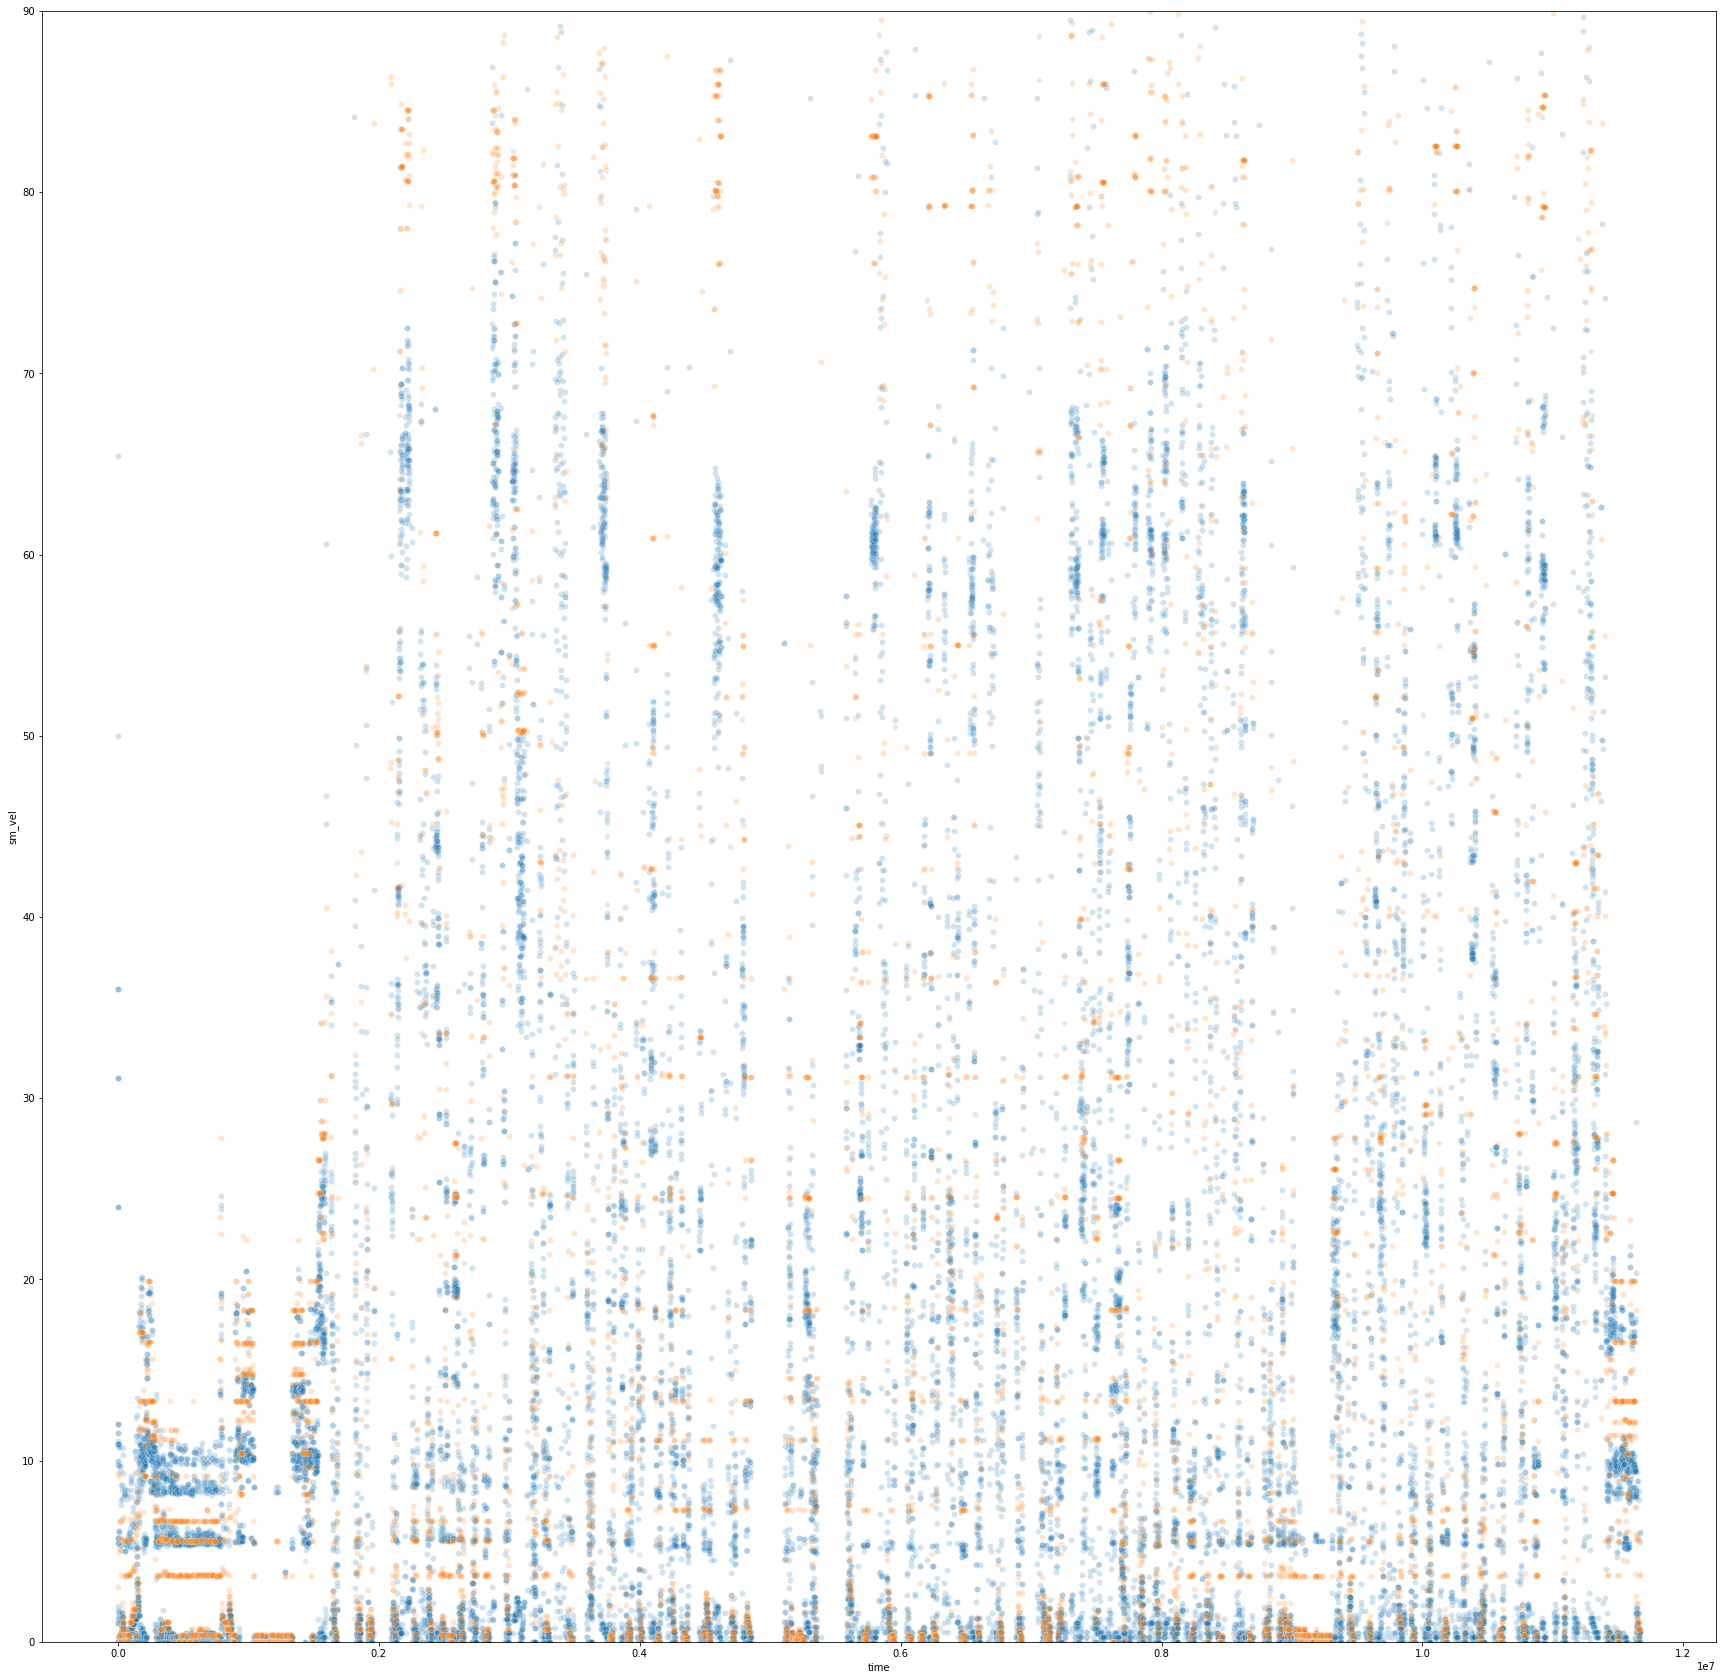

In [47]:
plt.figure(figsize=(30,30))
sb.scatterplot(x="time", y = "sm_vel", data=ave, alpha= 0.2)
sb.scatterplot(x="time", y = "speed", data=rev_ave, alpha= 0.2)
plt.ylim(0, 90)
plt.show()

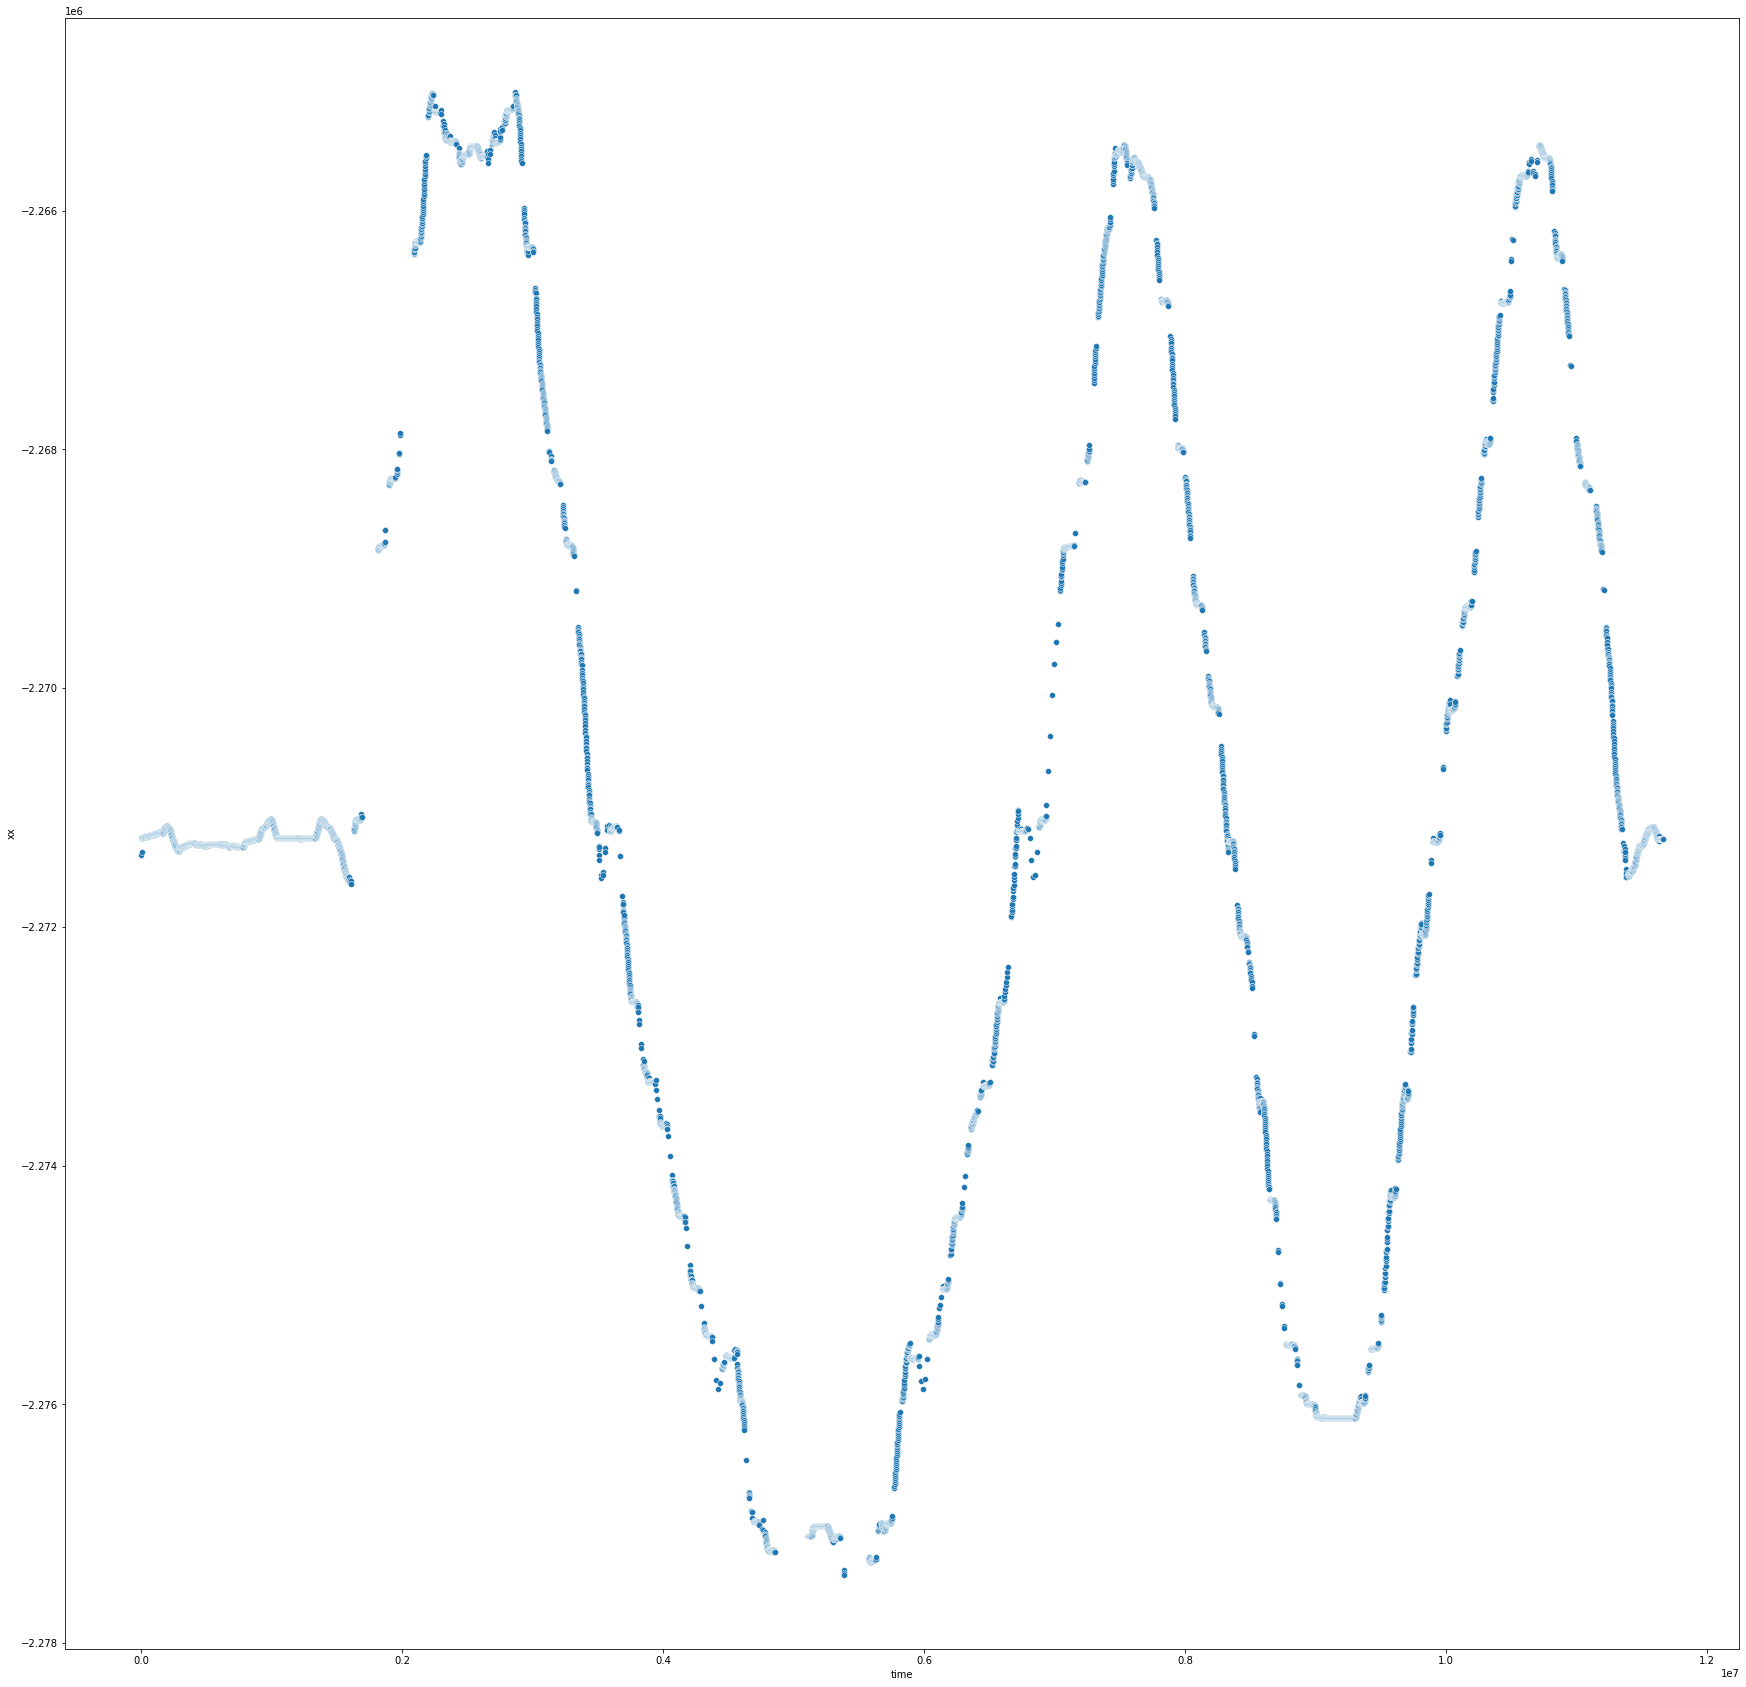

In [48]:
plt.figure(figsize=(30,30))
sb.scatterplot(x= "time", y = "xx", data = rev_ave)
plt.show()

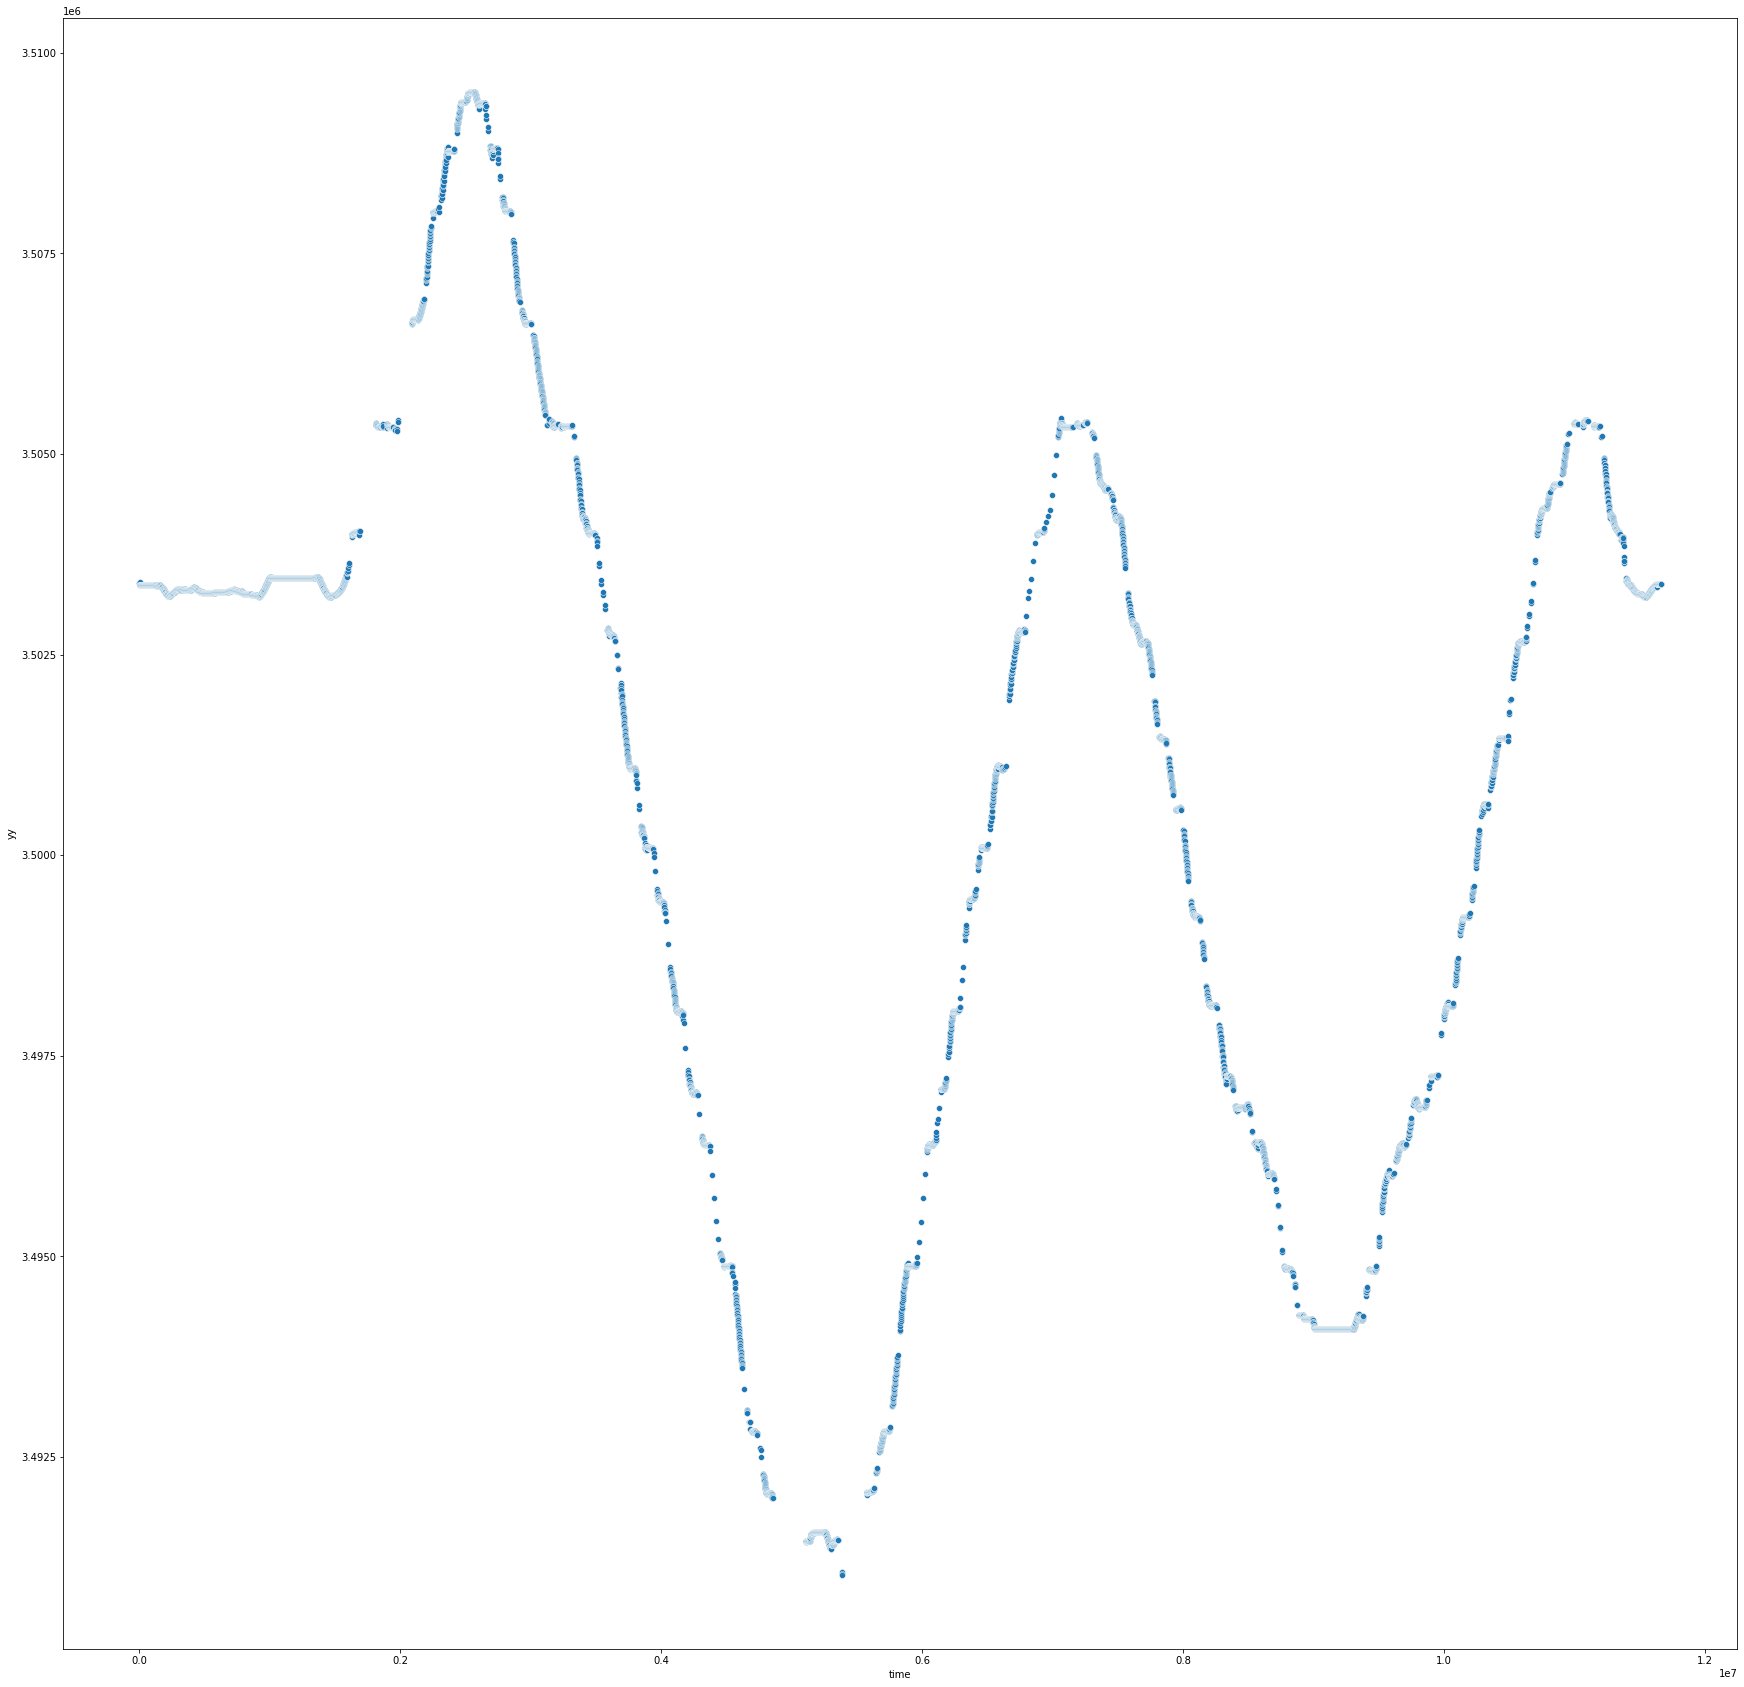

In [49]:
plt.figure(figsize=(30,30))
sb.scatterplot(x= "time", y = "yy", data = rev_ave)
plt.show()

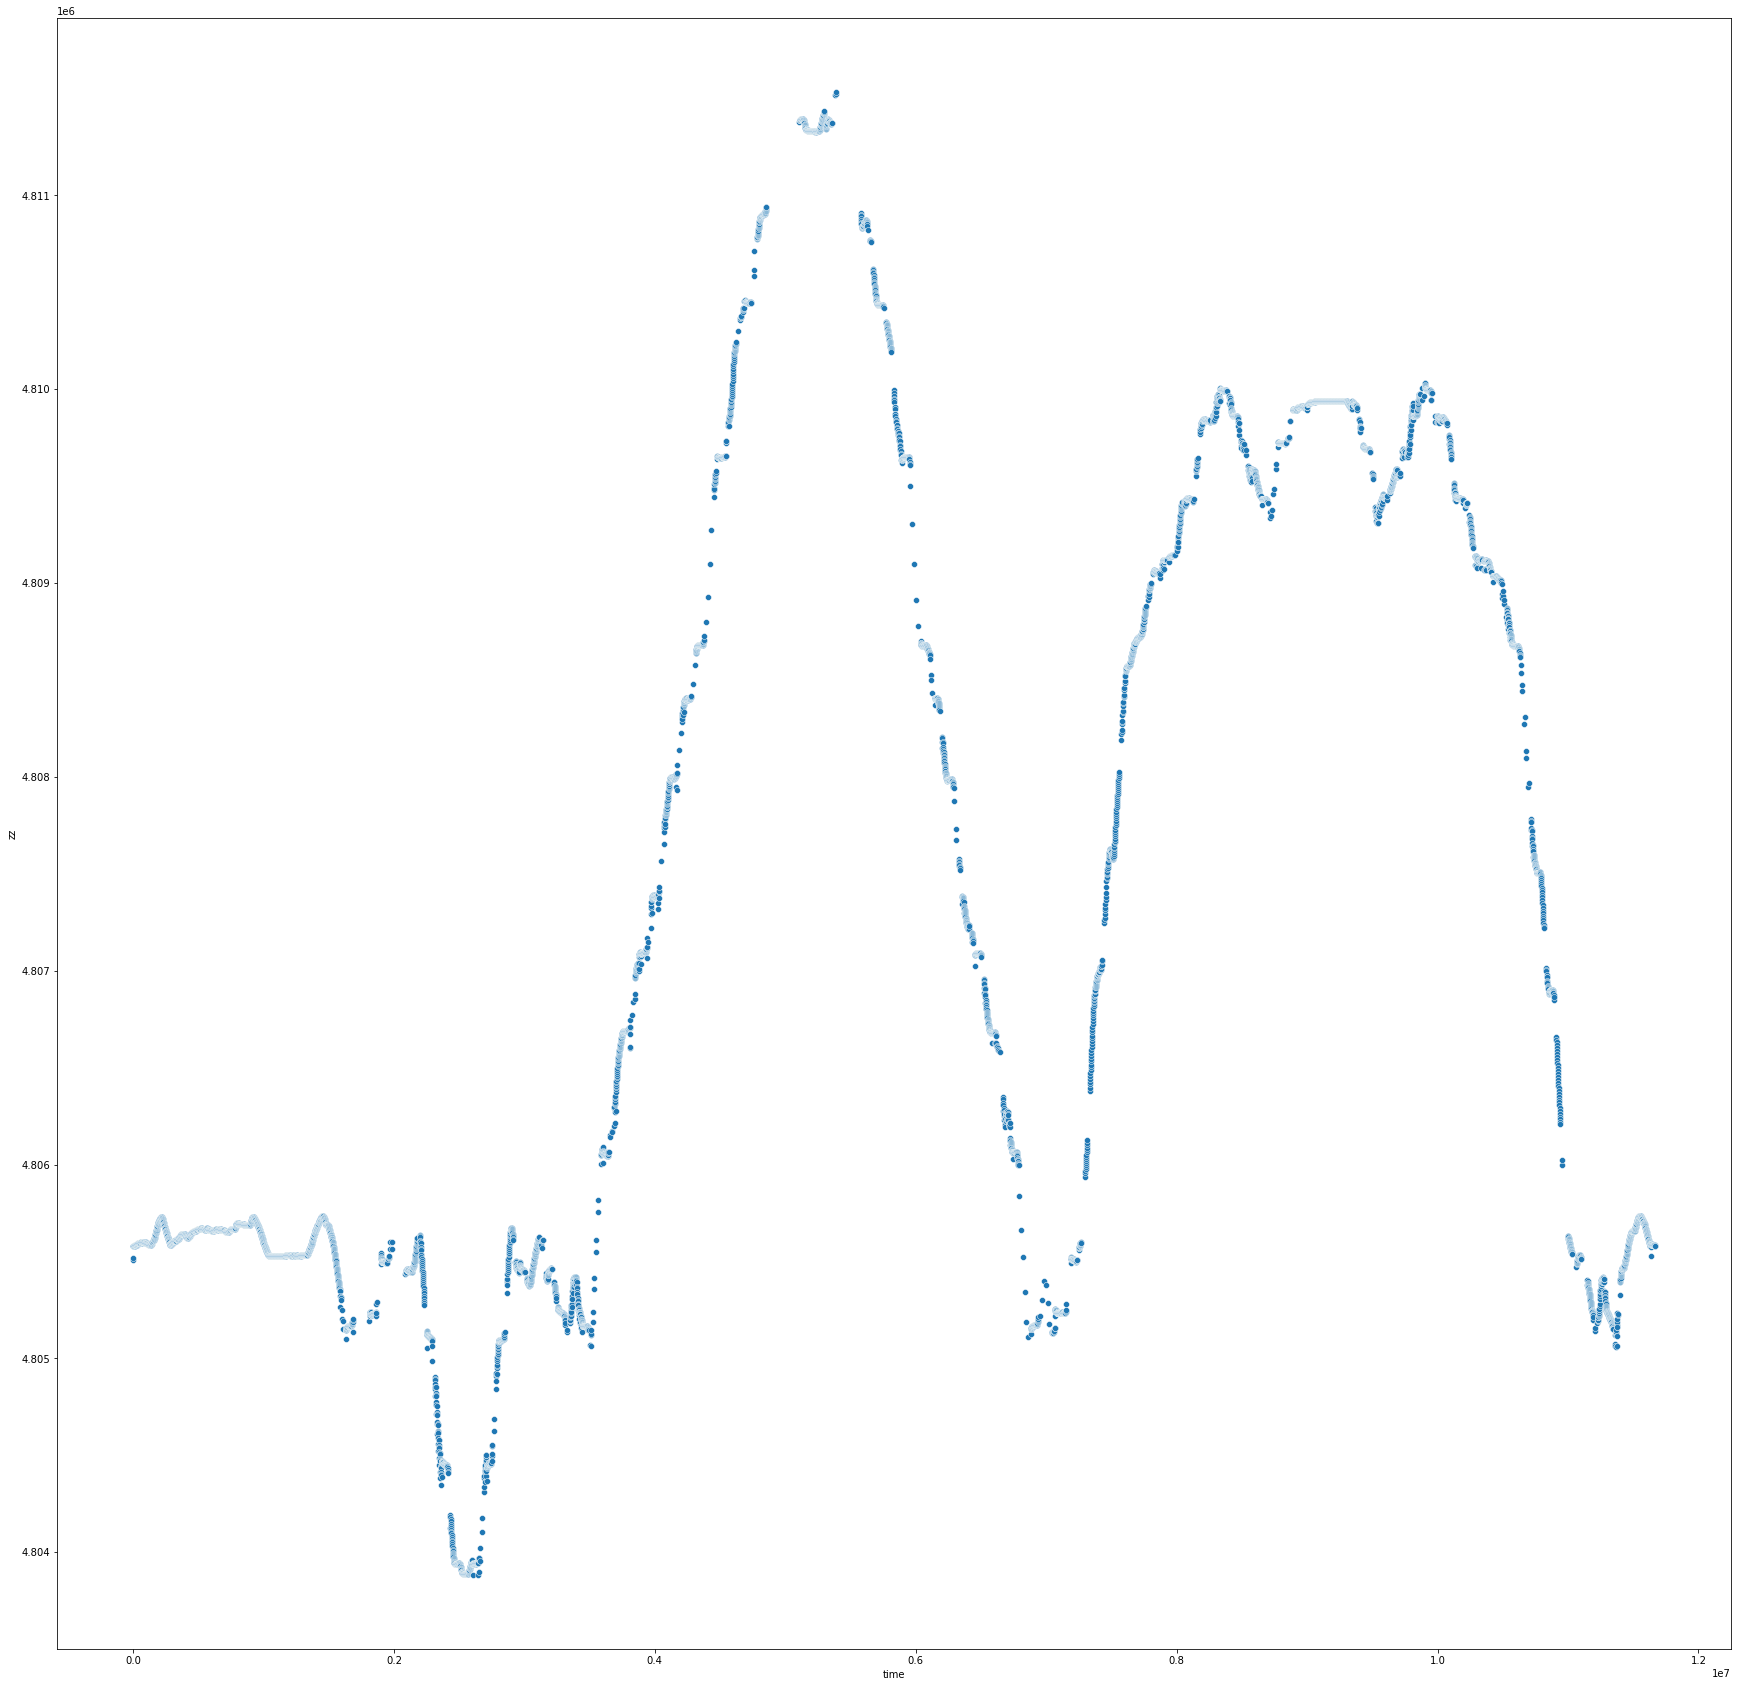

In [50]:
plt.figure(figsize=(30,30))
sb.scatterplot(x= "time", y = "zz", data = rev_ave)
plt.show()

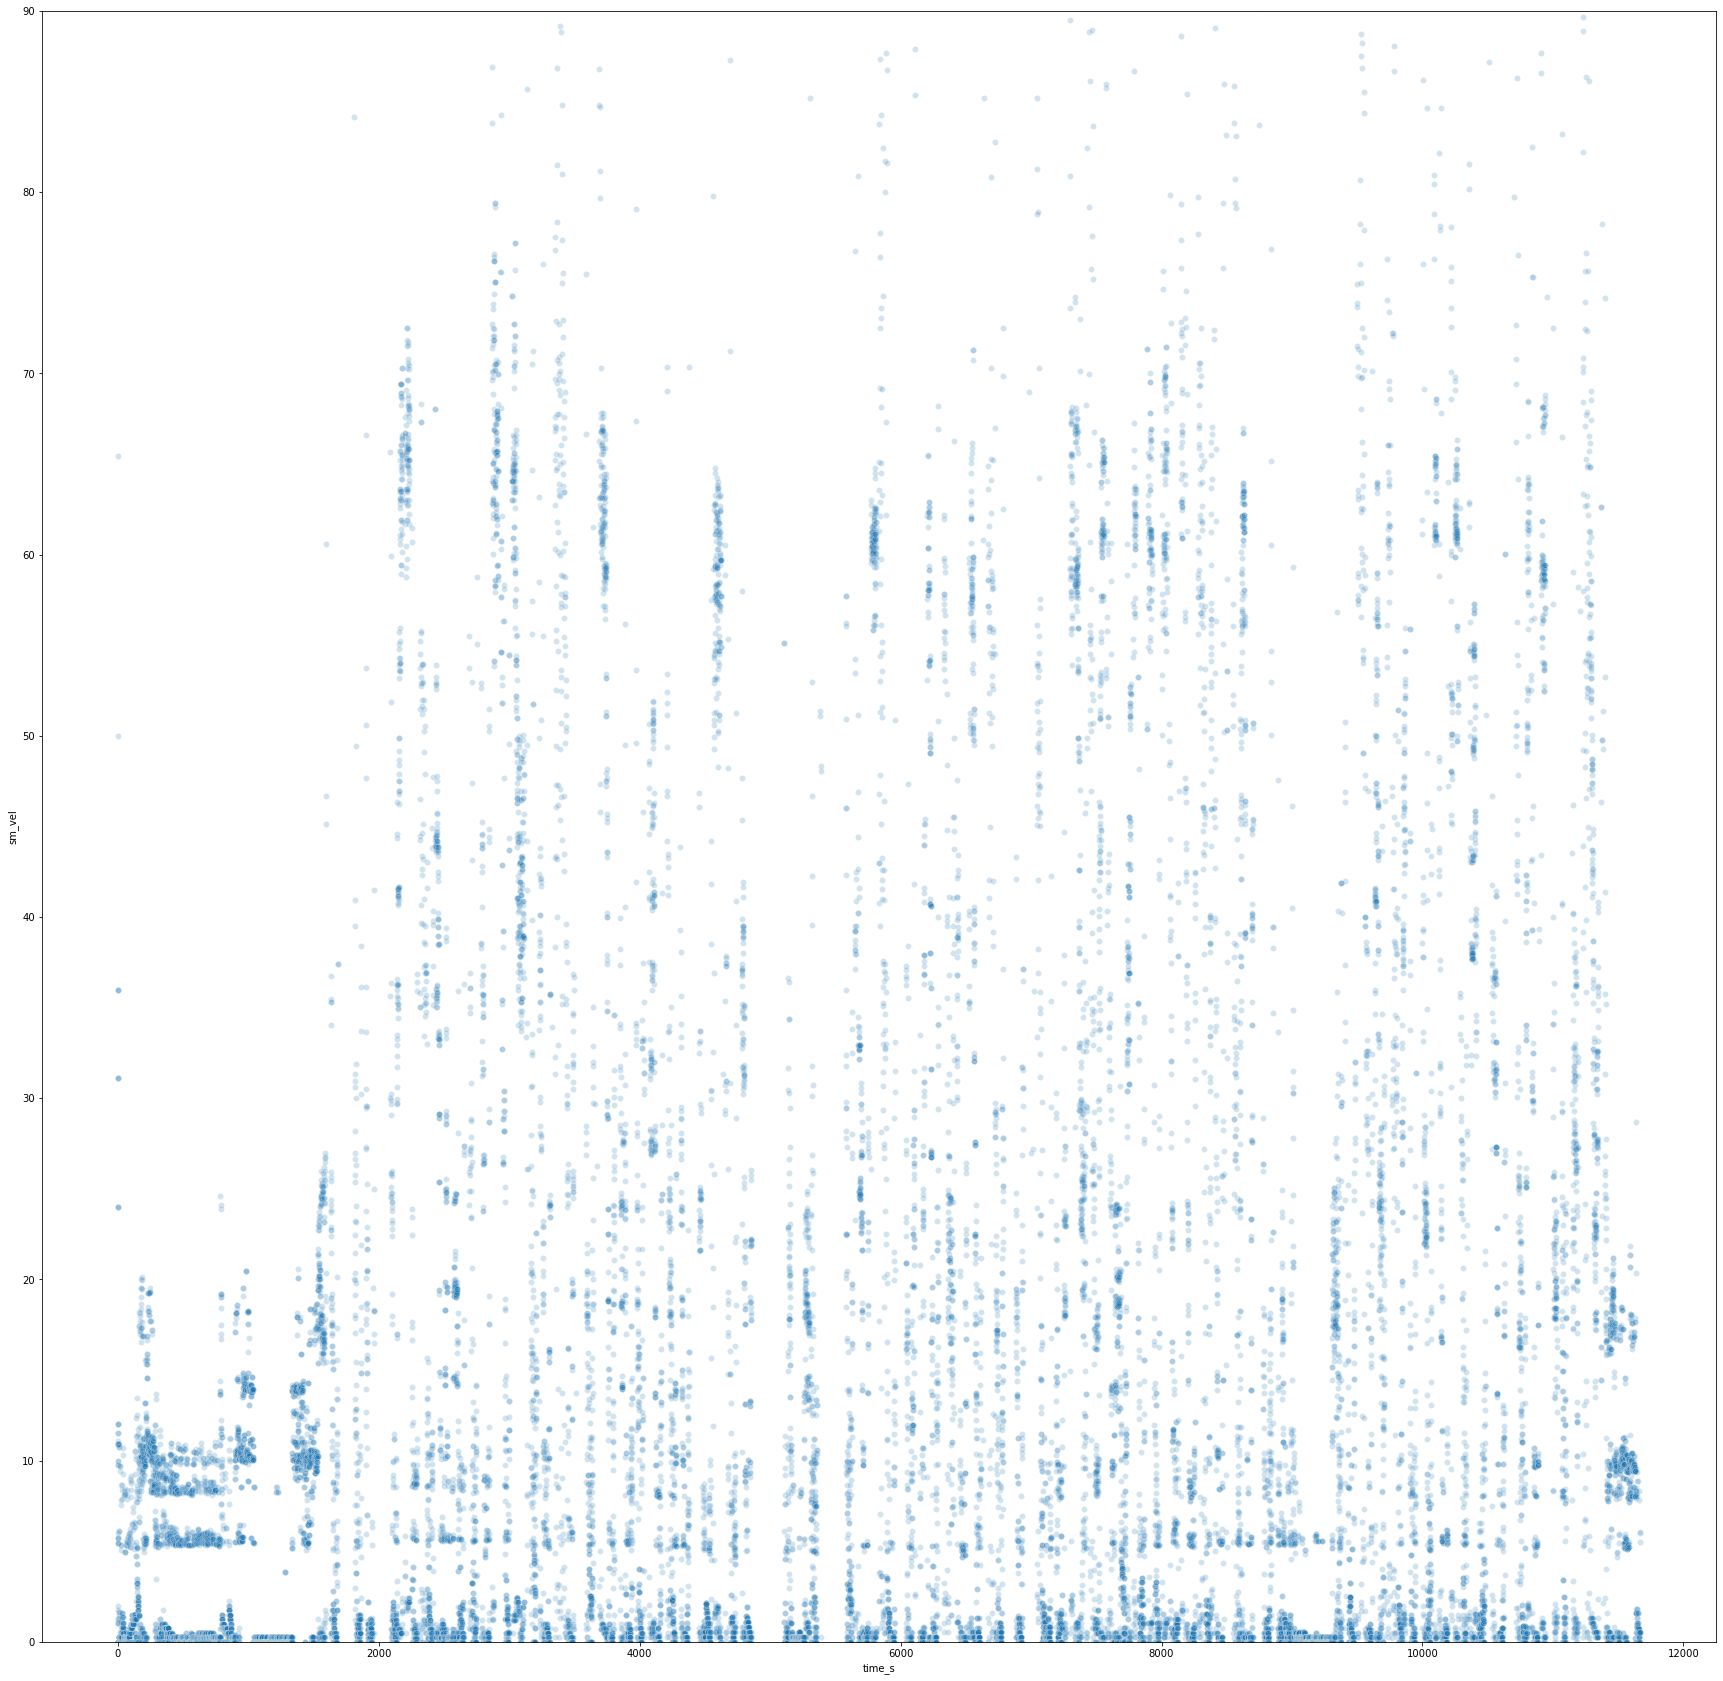

In [51]:
plt.figure(figsize=(30,30))
sb.scatterplot(x="time_s", y = "sm_vel", data=ave, alpha= 0.2)
plt.ylim(0, 90)
plt.show()

In [52]:
spd_chk = 72.5/(.374-.363)
spd_km = spd_chk * 3.6
spd_km

23727.272727272706

In [53]:
df.head()

,time,0_x,10_x,20_x,30_x,40_x,50_x,60_x,70_x,80_x,...,2500_y,2510_y,2520_y,2530_y,2540_y,2550_y,mean_acc_y,median_y,95_acc_y,max_acc_y
0,0,0.001609,0.000450,0.000286,0.000167,0.000151,0.000127,0.000106,0.000109,0.000107,...,0.000021,0.000013,0.000014,0.000017,0.000015,0.000028,0.006499,0.005735,0.014936,0.021827
1,1000,0.001758,0.000274,0.000251,0.000161,0.000157,0.000120,0.000110,0.000095,0.000075,...,0.000013,0.000017,0.000016,0.000022,0.000014,0.000018,0.003935,0.003335,0.009474,0.018177
2,2000,0.001389,0.000288,0.000171,0.000158,0.000107,0.000118,0.000092,0.000096,0.000092,...,0.000017,0.000022,0.000015,0.000015,0.000018,0.000016,0.005013,0.004526,0.011205,0.017957
3,3000,0.001315,0.000237,0.000181,0.000144,0.000134,0.000138,0.000081,0.000129,0.000068,...,0.000016,0.000018,0.000018,0.000022,0.000017,0.000018,0.005484,0.004502,0.013789,0.021666
4,4000,0.001686,0.000267,0.000198,0.000187,0.000127,0.000233,0.000238,0.000104,0.000084,...,0.000018,0.000017,0.000016,0.000016,0.000022,0.000018,0.007443,0.006522,0.018230,0.033521


In [54]:
df_max = df.min()
df_max

time          0.000000
0_x           0.000000
10_x          0.000000
20_x          0.000000
30_x          0.000000
                ...   
2550_y        0.000000
mean_acc_y    0.003377
median_y      0.002844
95_acc_y      0.008172
max_acc_y     0.013382
Length: 521, dtype: float64

In [55]:
df.isna().sum().sum()


0

In [57]:
df_lab = df.copy()
df_lab["gm_lab"] = 0

In [56]:
from sklearn.mixture import GaussianMixture
# gm = GaussianMixture(n_components =2).fit(np.log(df))
gm_lab = GaussianMixture(n_components =2).fit_predict(np.log(df.drop("time", axis = 1).abs()))
df_lab = df.copy()
df_lab["gm_lab"] = 0
df_lab["gm_lab"] = gm_lab.labels_

C:\ProgramData\Anaconda3\envs\PyTorch_37\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [58]:
rev_ave.loc[(rev_ave.time < 1682000) & (rev_ave.time > 1638000), :]


,time,xx,yy,zz,dist,speed,b_vel
1639,1639000,-2.271128e+06,3.504016e+06,4.805159e+06,6.269796,22.571266,1.0
1640,1640000,-2.271121e+06,3.504017e+06,4.805161e+06,6.832138,24.595699,1.0
1641,1641000,-2.271116e+06,3.504018e+06,4.805161e+06,5.337609,19.215392,1.0
1642,1642000,-2.271113e+06,3.504019e+06,4.805162e+06,3.596451,12.947224,1.0
1643,1643000,-2.271109e+06,3.504020e+06,4.805163e+06,4.546942,16.368991,1.0
1644,1644000,-2.271105e+06,3.504021e+06,4.805163e+06,3.527669,12.699608,1.0
1645,1645000,-2.271101e+06,3.504020e+06,4.805165e+06,4.179653,15.046752,1.0
1646,1646000,-2.271098e+06,3.504021e+06,4.805167e+06,3.998209,14.393551,1.0
1647,1647000,-2.271095e+06,3.504021e+06,4.805166e+06,2.797886,10.072388,1.0
1648,1648000,-2.271094e+06,3.504021e+06,4.805165e+06,1.494845,5.381440,1.0


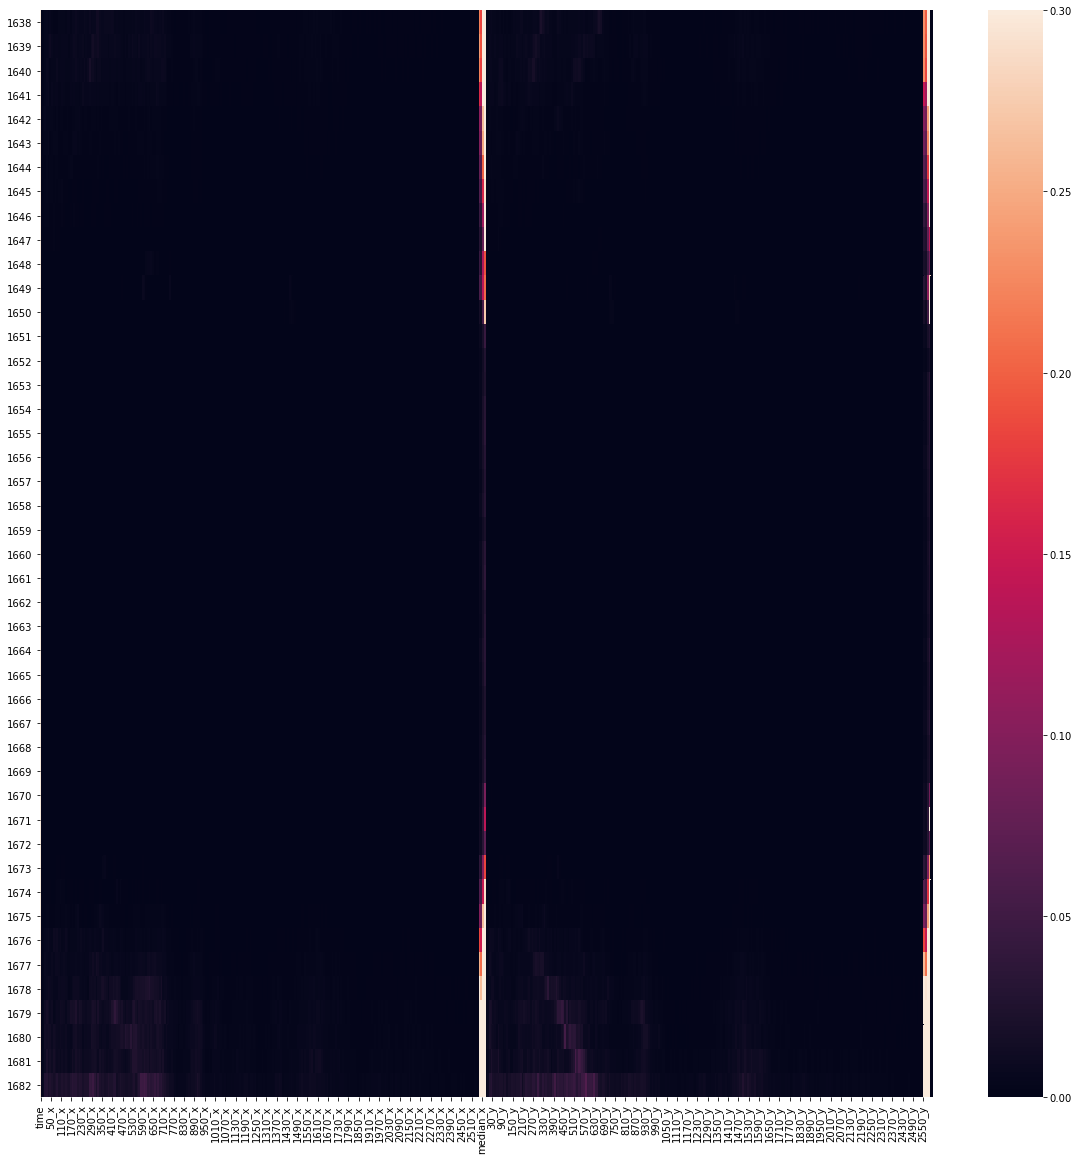

In [59]:
plt.figure(figsize=(20,20))
sb.heatmap(df_lab.iloc[1638:1683, :], vmax = 0.3)
plt.show()

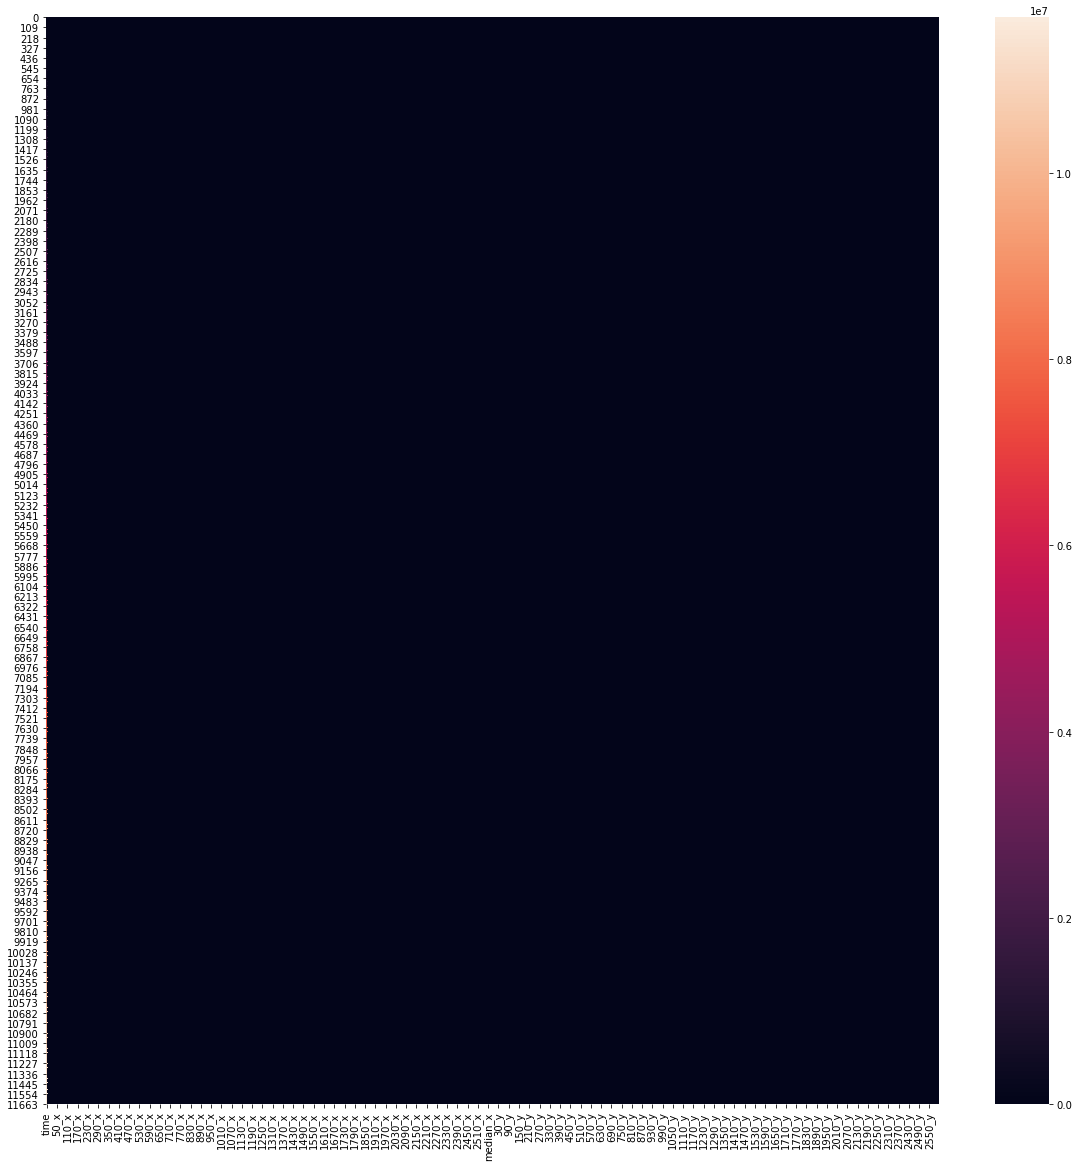

In [60]:
plt.figure(figsize=(20,20))
sb.heatmap(df_lab)
plt.show()

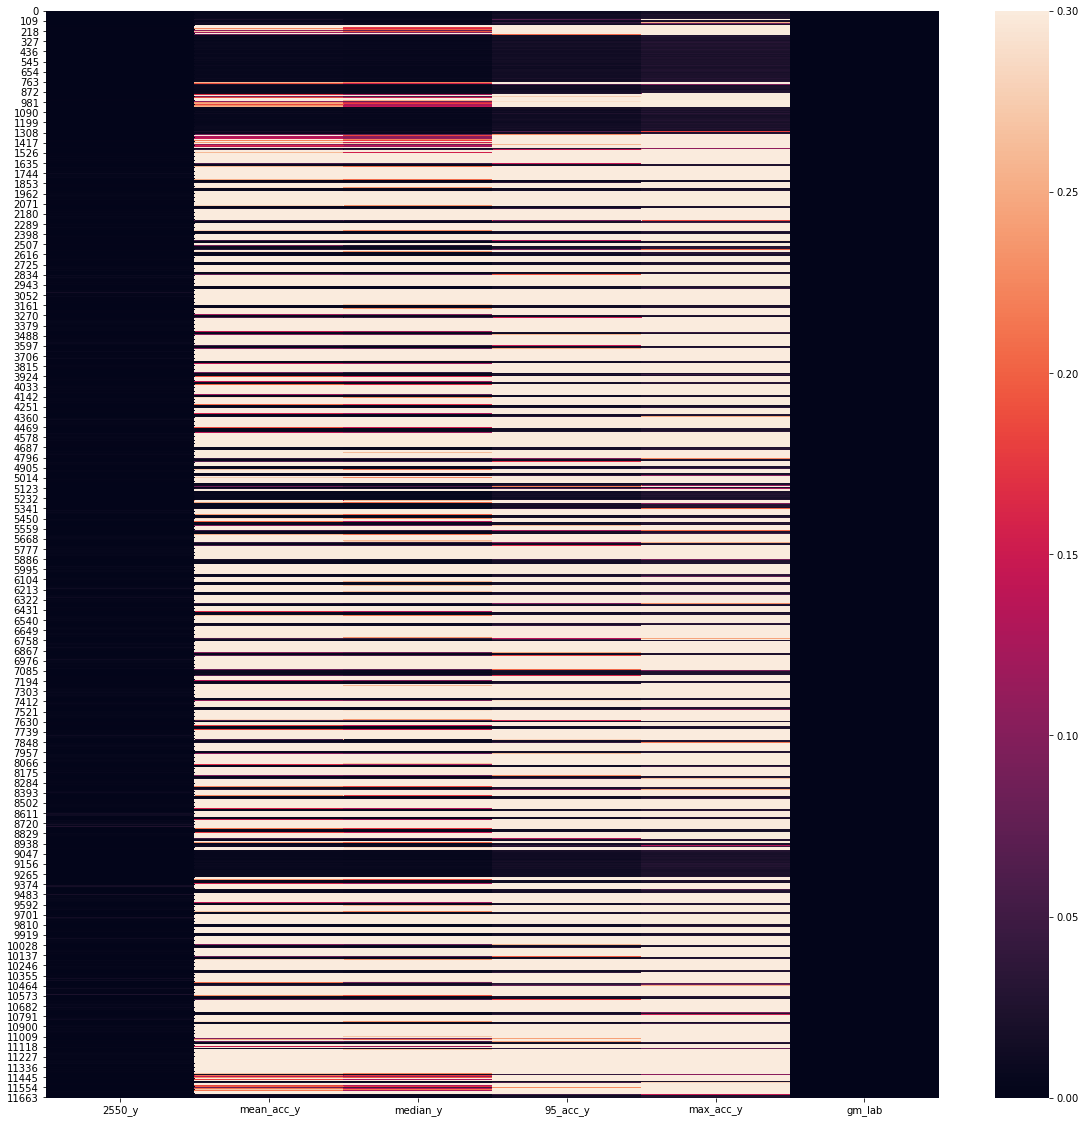

In [61]:
plt.figure(figsize=(20,20))
sb.heatmap(df_lab.iloc[:,-6:], vmax = 0.3)
plt.show()

In [62]:
df_lab.iloc[1655:1665,:]

,time,0_x,10_x,20_x,30_x,40_x,50_x,60_x,70_x,80_x,...,2510_y,2520_y,2530_y,2540_y,2550_y,mean_acc_y,median_y,95_acc_y,max_acc_y,gm_lab
1655,1655000,0.001737,0.000274,0.000175,0.000129,0.000136,0.000467,0.000257,0.000096,0.000085,...,0.000017,0.000017,0.000016,0.000017,0.000016,0.006340,0.005309,0.015236,0.028288,0
1656,1656000,0.001663,0.000372,0.000256,0.000203,0.000176,0.000451,0.000148,0.000106,0.000093,...,0.000018,0.000021,0.000015,0.000014,0.000011,0.008564,0.007999,0.018221,0.027496,0
1657,1657000,0.001255,0.000399,0.000163,0.000176,0.000136,0.000382,0.000212,0.000082,0.000083,...,0.000015,0.000014,0.000011,0.000018,0.000016,0.006969,0.006208,0.015995,0.024757,0
1658,1658000,0.001551,0.000415,0.000208,0.000167,0.000107,0.000491,0.000189,0.000109,0.000102,...,0.000013,0.000015,0.000017,0.000011,0.000018,0.006392,0.005339,0.016145,0.024526,0
1659,1659000,0.001111,0.000327,0.000186,0.000213,0.000211,0.000290,0.000155,0.000112,0.000115,...,0.000018,0.000018,0.000010,0.000014,0.000014,0.004990,0.004250,0.011966,0.021950,0
1660,1660000,0.001468,0.000304,0.000200,0.000193,0.000124,0.000428,0.000143,0.000089,0.000064,...,0.000017,0.000014,0.000016,0.000015,0.000017,0.006229,0.005340,0.015167,0.025921,0
1661,1661000,0.001546,0.000409,0.000244,0.000173,0.000142,0.000457,0.000187,0.000109,0.000066,...,0.000017,0.000013,0.000015,0.000016,0.000015,0.006354,0.005868,0.013929,0.024801,0
1662,1662000,0.001466,0.000313,0.000233,0.000167,0.000156,0.000467,0.000147,0.000107,0.000086,...,0.000012,0.000017,0.000015,0.000016,0.000014,0.006388,0.005369,0.015493,0.024045,0
1663,1663000,0.001086,0.000293,0.000218,0.000218,0.000189,0.000483,0.000141,0.000157,0.000096,...,0.000016,0.000012,0.000021,0.000016,0.000013,0.005491,0.004589,0.013587,0.021774,0
1664,1664000,0.001811,0.000161,0.000238,0.000210,0.000187,0.000466,0.000201,0.000100,0.000069,...,0.000018,0.000023,0.000016,0.000011,0.000015,0.007034,0.006107,0.016582,0.031336,0


In [63]:
len(df3)
diffs = []
for i in np.arange(1, len(df3)):
    diffs.append(df3.time[i] - df3.time[i-1])
    

(0.0, 86860816.0597514)

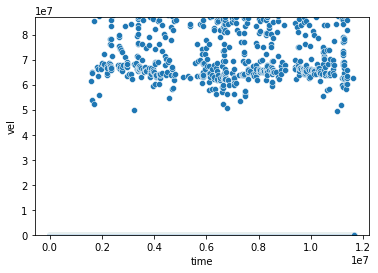

In [64]:
g = sb.scatterplot(x="time", y = "vel", data =df3)
plt.ylim(0, df3.vel.quantile(q=0.99))

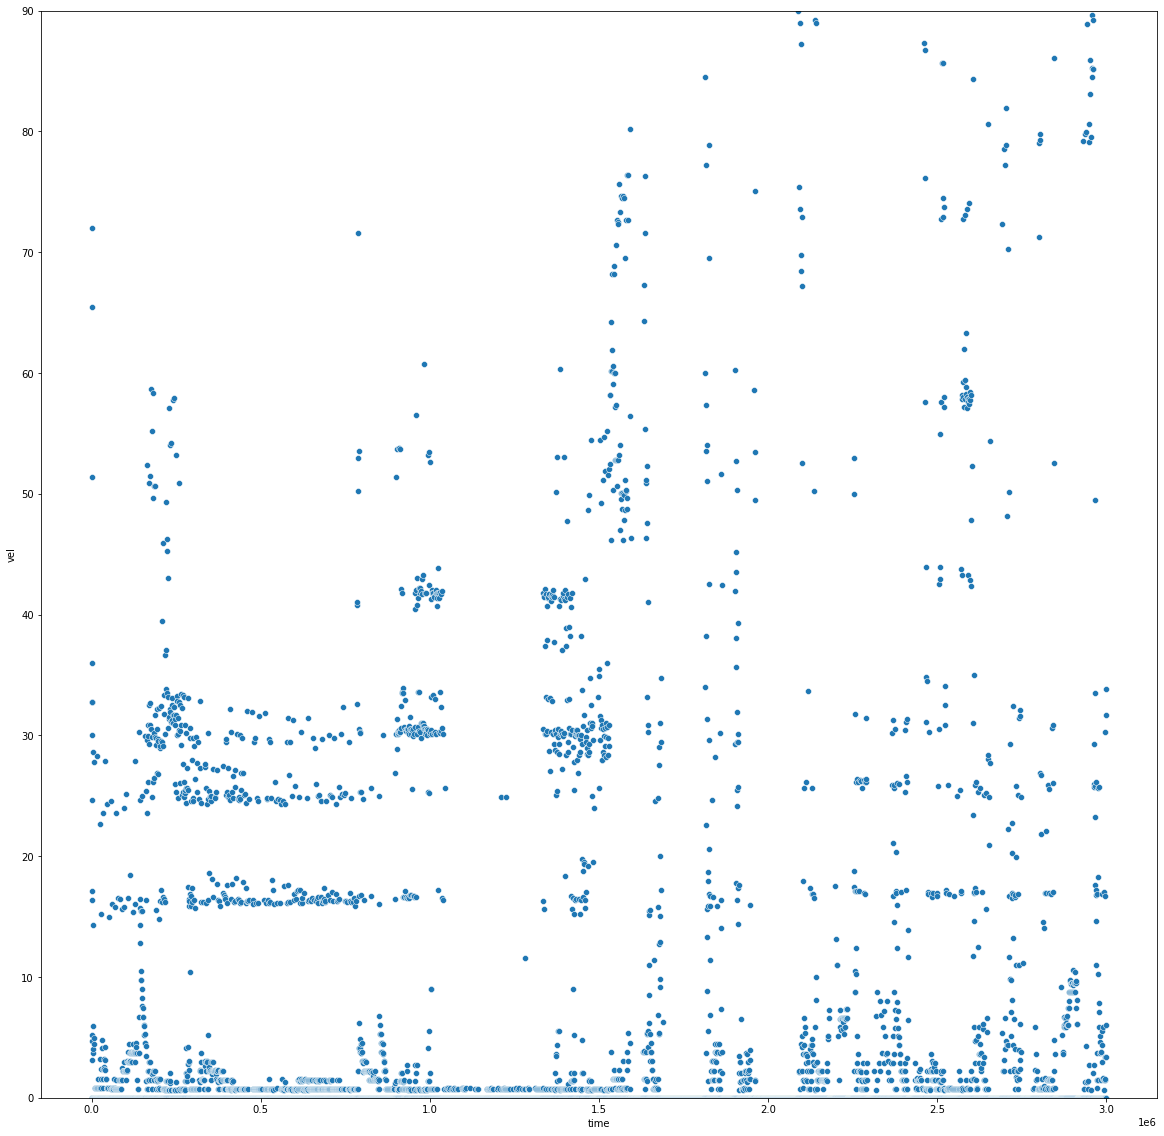

In [65]:
plt.figure(figsize=(20,20))
g = sb.scatterplot(x="time", y = "vel", data =df3.loc[df3.time <3000000])
plt.ylim(0, 90)
plt.show()

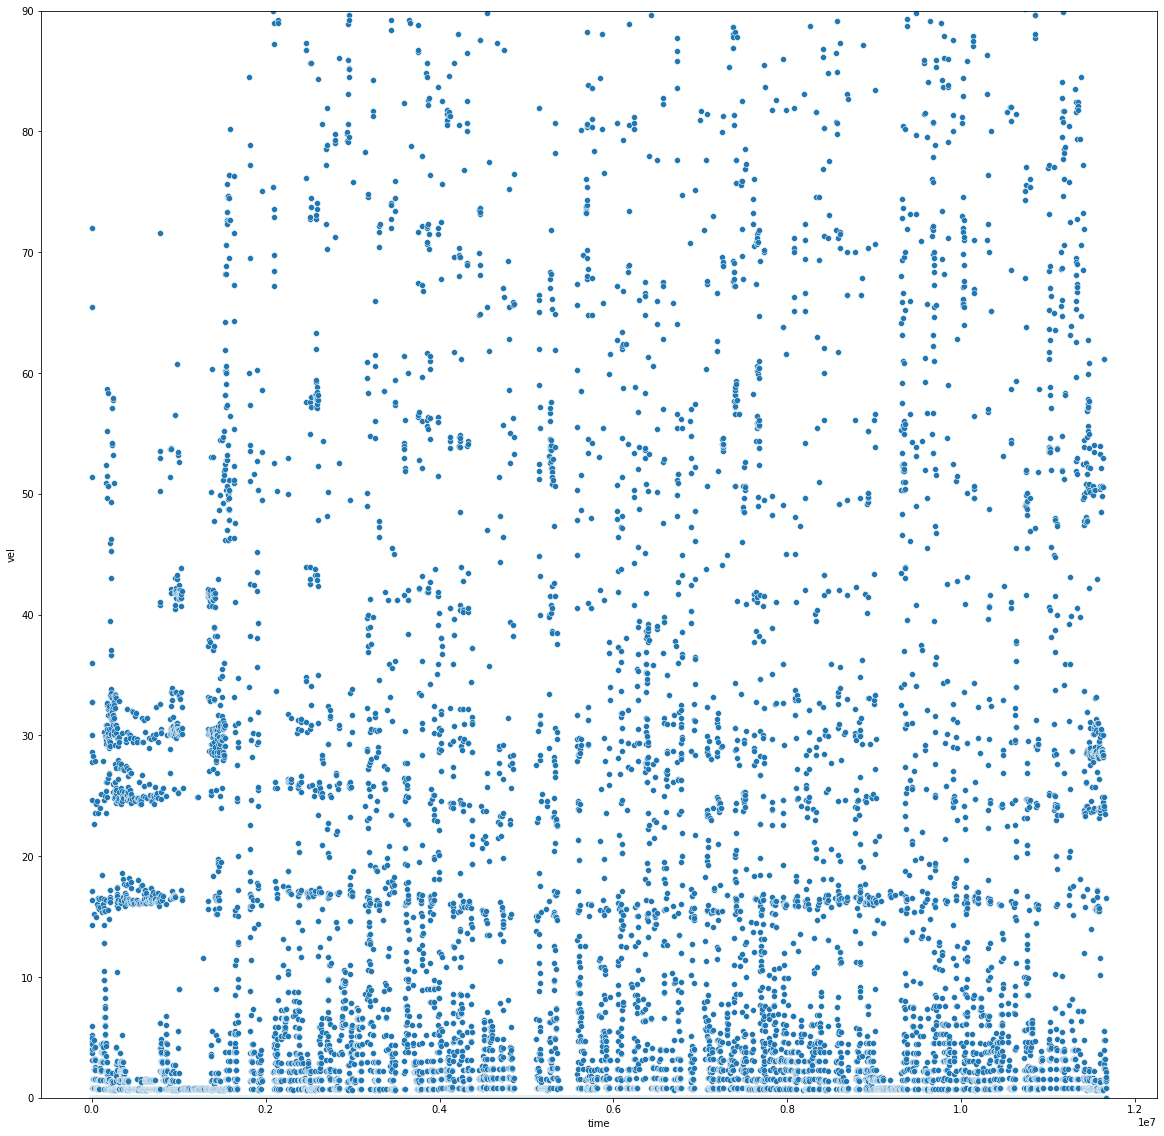

In [66]:
plt.figure(figsize=(20,20))
g = sb.scatterplot(x="time", y = "vel", data =df3)
plt.ylim(0, 90)
plt.show()

C:\ProgramData\Anaconda3\envs\PyTorch_37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

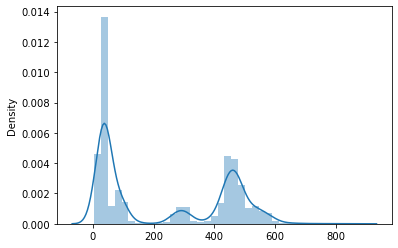

In [67]:
sb.distplot(diffs)

In [68]:
# df3.loc[(df3.lat <49.2) & (df3.lat>49.19975) & (df3.long < -122.945 ) & (df3.long > -122.955)]
twen = df3.loc[(df3.lat <49.201) & (df3.lat>49.199) & (df3.long < -122.948 ) & (df3.long > -122.949)]
print(twen.shape)
twen.head()

(387, 12)


,lat,long,alt,time,xx,yy,zz,disp,vel,b_vel,time_s,disp_km
6332,49.200056,-122.948972,51.6,1644669,-2.271103e+06,3.504021e+06,4.805165e+06,3.693505,30.288421,1,1644.669,0.003694
6333,49.200056,-122.948972,50.8,1645186,-2.271103e+06,3.504020e+06,4.805164e+06,0.800000,5.570600,1,1645.186,0.000800
6334,49.200056,-122.948972,50.8,1645226,-2.271103e+06,3.504020e+06,4.805164e+06,0.000000,0.000000,0,1645.226,0.000000
6335,49.200083,-122.948917,50.8,1645673,-2.271098e+06,3.504020e+06,4.805166e+06,5.092809,41.015913,1,1645.673,0.005093
6336,49.200083,-122.948917,51.4,1646190,-2.271099e+06,3.504021e+06,4.805167e+06,0.600000,4.177950,1,1646.190,0.000600


In [69]:
twen.loc[twen.time < 1644669 + 90000].describe()

,lat,long,alt,time,xx,yy,zz,disp,vel,b_vel,time_s,disp_km
count,160.000000,160.000000,160.000000,1.600000e+02,1.600000e+02,1.600000e+02,1.600000e+02,1.600000e+02,1.600000e+02,160.000000,160.000000,160.000000
mean,49.200092,-122.948866,55.264375,1.665335e+06,-2.271096e+06,3.504024e+06,4.805170e+06,6.560395e+04,3.262108e+05,0.293750,1665.334831,65.603951
std,0.000040,0.000083,8.968101,1.186753e+04,6.435946e+00,5.329750e+00,8.159064e+00,8.298186e+05,4.126170e+06,0.456909,11.867532,829.818633
min,49.200056,-122.948972,0.000000,1.644669e+06,-2.271103e+06,3.503995e+06,4.805138e+06,0.000000e+00,0.000000e+00,0.000000,1644.669000,0.000000
25%,49.200083,-122.948917,52.300000,1.655222e+06,-2.271100e+06,3.504022e+06,4.805167e+06,0.000000e+00,0.000000e+00,0.000000,1655.222250,0.000000
50%,49.200083,-122.948889,54.600000,1.665197e+06,-2.271098e+06,3.504023e+06,4.805168e+06,0.000000e+00,0.000000e+00,0.000000,1665.197000,0.000000
75%,49.200083,-122.948861,55.500000,1.675200e+06,-2.271096e+06,3.504025e+06,4.805170e+06,3.250000e-01,2.468354e+00,1.000000,1675.200000,0.000325
max,49.200222,-122.948472,83.000000,1.688254e+06,-2.271055e+06,3.504046e+06,4.805201e+06,1.049647e+07,5.219239e+07,1.000000,1688.254000,10496.468724


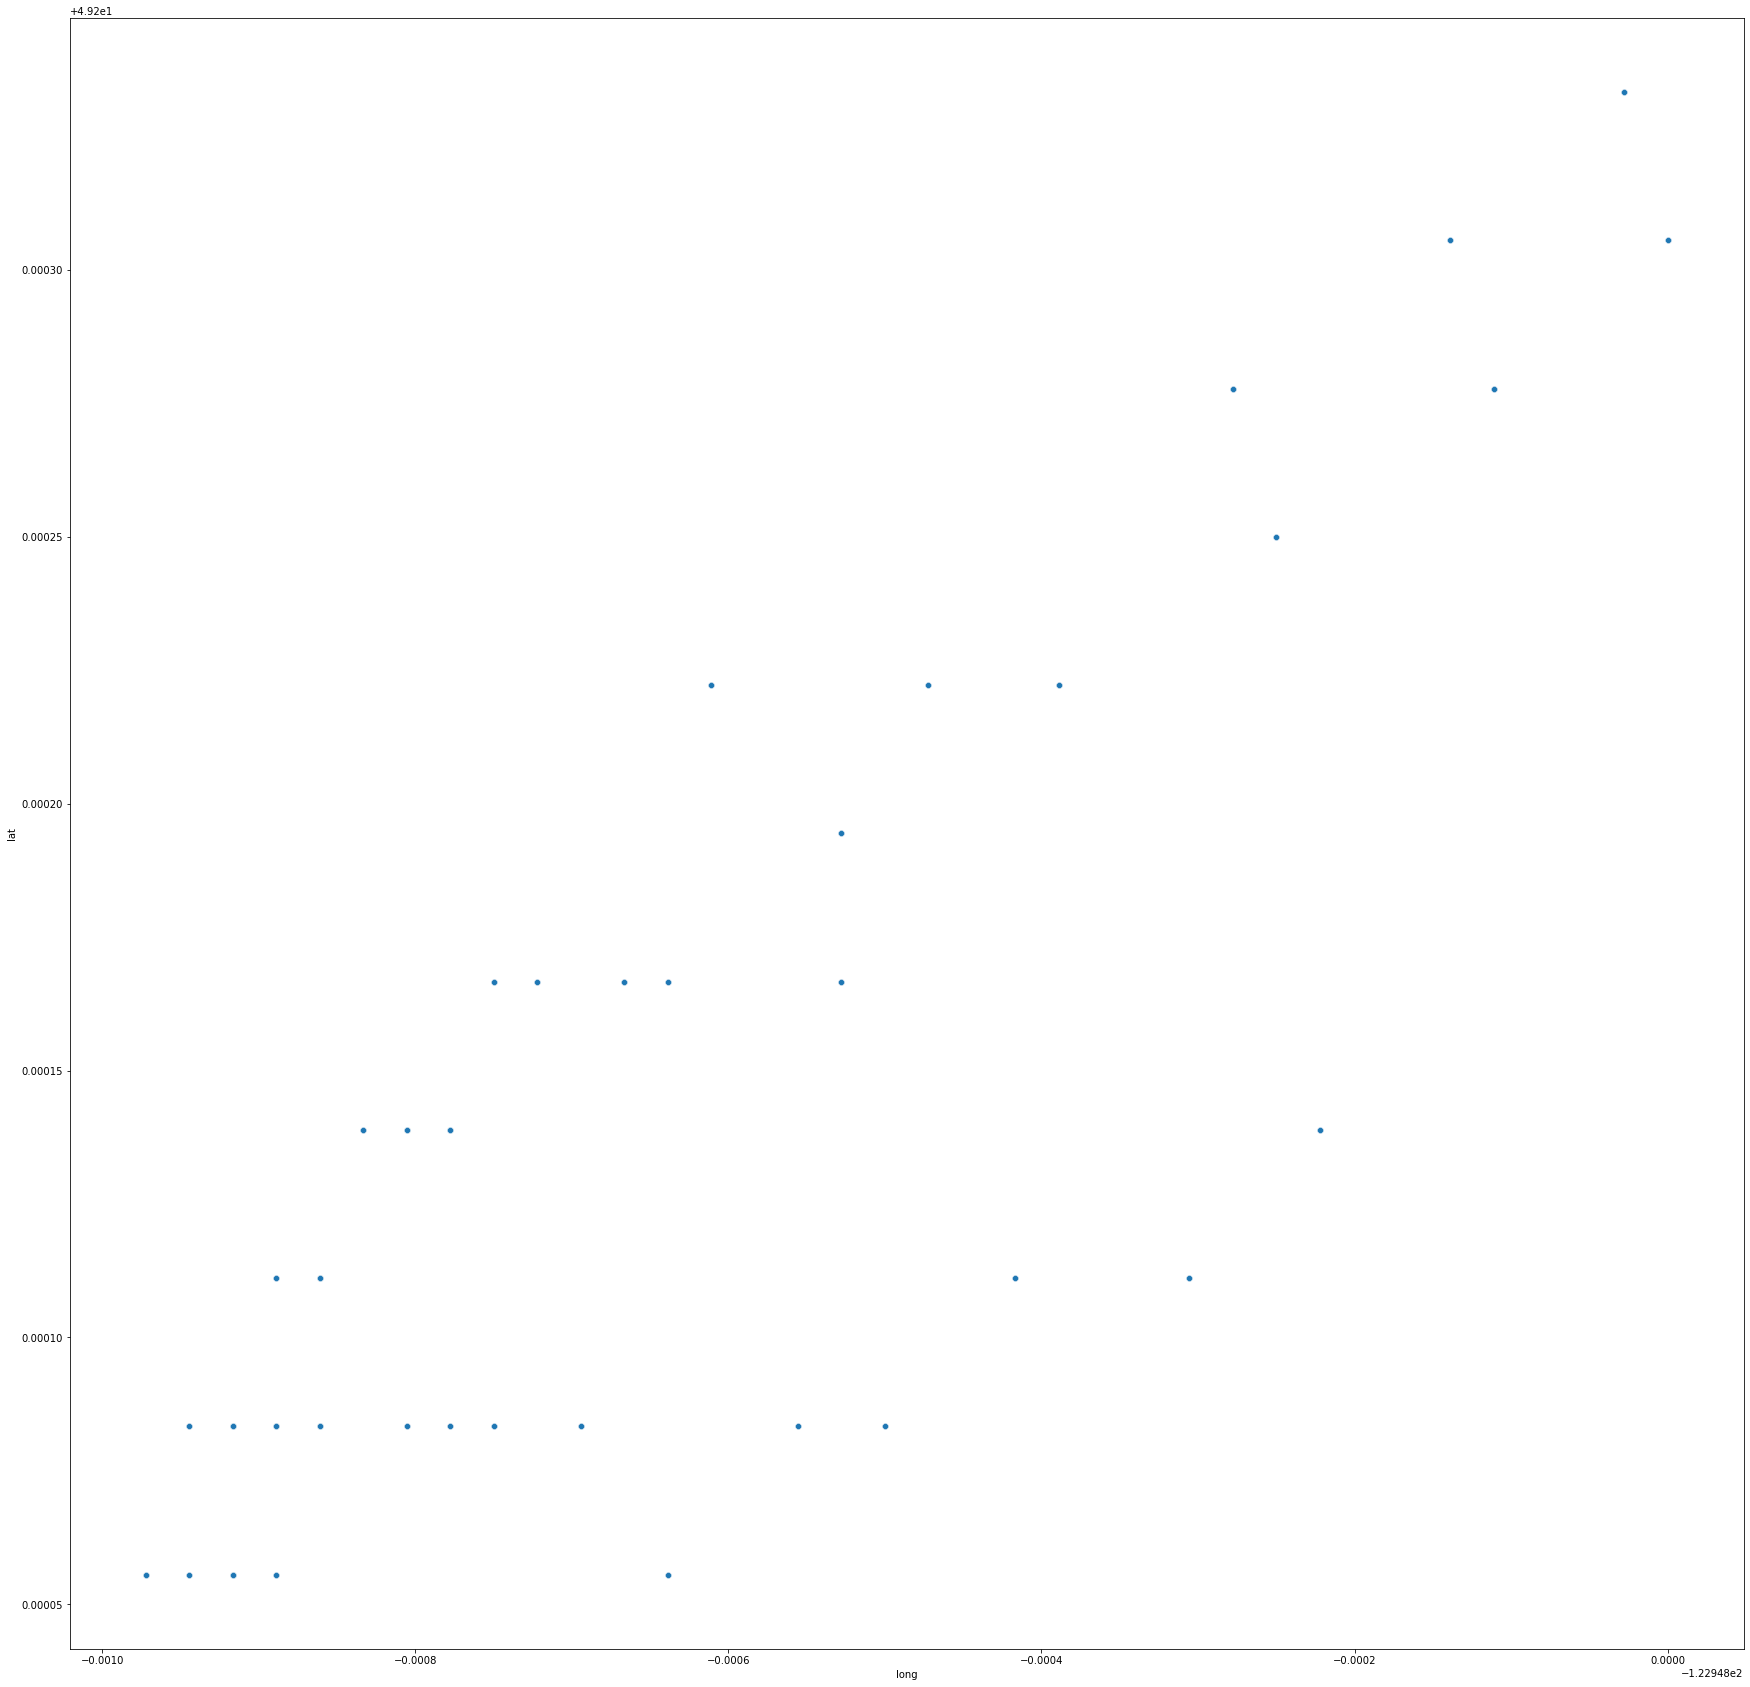

In [70]:
plt.figure(figsize=(30,30))
sb.scatterplot(x="long", y="lat", data = df3.loc[(df3.lat <49.201) & (df3.lat>49.199) & (df3.long < -122.948 ) & (df3.long > -122.949)])
plt.show()

In [71]:
options = np.arange(0, 10000, 100)
indexer = df.time.max()

In [72]:
df_lab.head()

,time,0_x,10_x,20_x,30_x,40_x,50_x,60_x,70_x,80_x,...,2510_y,2520_y,2530_y,2540_y,2550_y,mean_acc_y,median_y,95_acc_y,max_acc_y,gm_lab
0,0,0.001609,0.000450,0.000286,0.000167,0.000151,0.000127,0.000106,0.000109,0.000107,...,0.000013,0.000014,0.000017,0.000015,0.000028,0.006499,0.005735,0.014936,0.021827,0
1,1000,0.001758,0.000274,0.000251,0.000161,0.000157,0.000120,0.000110,0.000095,0.000075,...,0.000017,0.000016,0.000022,0.000014,0.000018,0.003935,0.003335,0.009474,0.018177,0
2,2000,0.001389,0.000288,0.000171,0.000158,0.000107,0.000118,0.000092,0.000096,0.000092,...,0.000022,0.000015,0.000015,0.000018,0.000016,0.005013,0.004526,0.011205,0.017957,0
3,3000,0.001315,0.000237,0.000181,0.000144,0.000134,0.000138,0.000081,0.000129,0.000068,...,0.000018,0.000018,0.000022,0.000017,0.000018,0.005484,0.004502,0.013789,0.021666,0
4,4000,0.001686,0.000267,0.000198,0.000187,0.000127,0.000233,0.000238,0.000104,0.000084,...,0.000017,0.000016,0.000016,0.000022,0.000018,0.007443,0.006522,0.018230,0.033521,0


In [73]:
scores = []
for i in options:
    test = df_lab.loc[:,["time", "gm_lab"]]
    test.time = test.time.apply(lambda x: x + i)
    test = pd.merge(test, df3, how = "outer", on = "time").sort_values(by = "time")
    test = test.loc[(test.time >= i) & (test.time <= i + indexer)]
    test = test.fillna(method = "bfill")
    test = test.fillna(method = "ffill")
    test.loc[test.lat < 40] = np.nan
    test.loc[test.lat < 40] = np.nan
    test["score"] = (test.gm_lab - test.b_vel) **2
#     print(test.score.sum())
    scores.append(test.score.sum())
#     print(i)
    
#     test = df_lab.gm_lab - df3.b_vel[i:i+len(df)]
#     test = test ** 2
#     test = test.sum()
#     scores.append(test)
#     print(test)
vmin = len(df) * 1000
best = 0
for c, v in enumerate(scores):
    
    if v < vmin:
        vmin = v
        best = c
print(best)
print( vmin, scores[best])    

81
14160.0 14160.0


<AxesSubplot:>

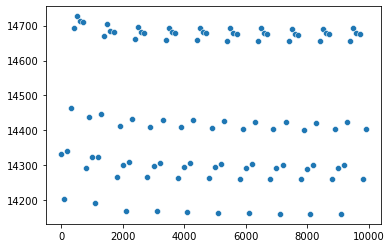

In [74]:
sb.scatterplot(x=options, y = scores)

In [75]:
scores = []
for i in options:
    test = df_lab.loc[:,["time", "gm_lab"]]
    test.time = test.time.apply(lambda x: x + i)
    test = pd.merge(test, ave, how = "outer", on = "time").sort_values(by = "time")
    test = test.loc[(test.time >= i) & (test.time <= i + indexer)]
    test = test.fillna(method = "bfill")
    test = test.fillna(method = "ffill")
    test.loc[test.lat < 40, "b_vel.isna()"] = np.nan
    test.loc[test.lat < 40, "gm_lab"] = np.nan
    test["score"] = (test.gm_lab - test.b_vel) **2
#     print(test.score.sum())
    scores.append(test.score.sum())
#     print(i)
    
#     test = df_lab.gm_lab - df3.b_vel[i:i+len(df)]
#     test = test ** 2
#     test = test.sum()
#     scores.append(test)
#     print(test)
vmin = len(df) * 1000
best = 0
for c, v in enumerate(scores):
    
    if v < vmin:
        vmin = v
        best = c
print(best)
print( vmin, scores[best])  

96
15062.0 15062.0


<AxesSubplot:>

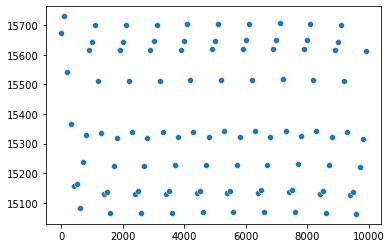

In [76]:
sb.scatterplot(x=options, y = scores)

80
9356.0 9356.0


<AxesSubplot:>

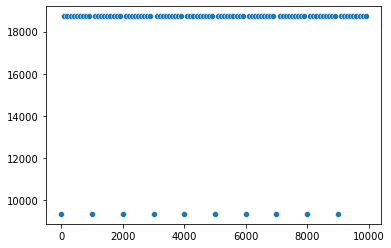

In [77]:
scores = []
for i in options:
    test = df_lab.loc[:,["time", "gm_lab"]]
    test.time = test.time.apply(lambda x: x + i)
    test = pd.merge(test, rev_ave, how = "outer", on = "time").sort_values(by = "time")
    test = test.loc[(test.time >= i) & (test.time <= i + indexer)]
    test = test.fillna(method = "bfill")
    test = test.fillna(method = "ffill")
    test.loc[test.speed.isna(), "b_vel"] = np.nan
    test.loc[test.speed.isna(), "gm_lab"] = np.nan
    test["score"] = (test.gm_lab - test.b_vel) **2
#     print(test.score.sum())
    scores.append(test.score.sum())
#     print(i)
    
#     test = df_lab.gm_lab - df3.b_vel[i:i+len(df)]
#     test = test ** 2
#     test = test.sum()
#     scores.append(test)
#     print(test)
vmin = len(df) * 1000
best = 0
for c, v in enumerate(scores):
    
    if v < vmin:
        vmin = v
        best = c
print(best)
print( vmin, scores[best])
sb.scatterplot(x=options, y = scores)

In [78]:
i = 0
test = df_lab.loc[:,["time", "gm_lab"]]
test.time = test.time.apply(lambda x: x + i)
test = pd.merge(test, rev_ave, how = "outer", on = "time").sort_values(by = "time")
test = test.loc[(test.time >= i) & (test.time <= i + indexer)]
test = test.fillna(method = "bfill")
test = test.fillna(method = "ffill")
test.loc[test.b_vel.isna(), "b_vel"] = np.nan
test.loc[test.b_vel.isna(), "gm_lab"] = np.nan
test["score"] = (test.gm_lab - test.b_vel) **2
print(test.score.sum())

9362.0


In [79]:
first = test.loc[(test.time > 1640000) & (test.time < 1676000)]
display(first)

,time,gm_lab,xx,yy,zz,dist,speed,b_vel,score
1641,1641000,0.0,-2.271116e+06,3.504018e+06,4.805161e+06,5.337609,19.215392,1.0,1.0
1642,1642000,0.0,-2.271113e+06,3.504019e+06,4.805162e+06,3.596451,12.947224,1.0,1.0
1643,1643000,0.0,-2.271109e+06,3.504020e+06,4.805163e+06,4.546942,16.368991,1.0,1.0
1644,1644000,0.0,-2.271105e+06,3.504021e+06,4.805163e+06,3.527669,12.699608,1.0,1.0
1645,1645000,0.0,-2.271101e+06,3.504020e+06,4.805165e+06,4.179653,15.046752,1.0,1.0
1646,1646000,0.0,-2.271098e+06,3.504021e+06,4.805167e+06,3.998209,14.393551,1.0,1.0
1647,1647000,0.0,-2.271095e+06,3.504021e+06,4.805166e+06,2.797886,10.072388,1.0,1.0
1648,1648000,0.0,-2.271094e+06,3.504021e+06,4.805165e+06,1.494845,5.381440,1.0,1.0
1649,1649000,0.0,-2.271095e+06,3.504022e+06,4.805165e+06,0.800000,2.880000,0.0,0.0
1650,1650000,0.0,-2.271096e+06,3.504022e+06,4.805166e+06,1.088375,3.918151,1.0,1.0


pytorch for neural network
differential from rail a - b as an indicator of rail deffect.

look for gps libraries

In [80]:
df_gps = df3.copy()
df_gps.head()

,lat,long,alt,time,xx,yy,zz,disp,vel,b_vel,time_s,disp_km
0,0.0,-0.0,0.0,304,6378137.0,0.0,0.0,0.0,0.0,0,0.304,0.0
1,0.0,-0.0,0.0,313,6378137.0,0.0,0.0,0.0,0.0,0,0.313,0.0
2,0.0,-0.0,0.0,320,6378137.0,0.0,0.0,0.0,0.0,0,0.320,0.0
3,0.0,-0.0,0.0,326,6378137.0,0.0,0.0,0.0,0.0,0,0.326,0.0
4,0.0,-0.0,0.0,330,6378137.0,0.0,0.0,0.0,0.0,0,0.330,0.0


In [81]:
df_gps.b_vel.loc[df3.lat < 40] = np.nan
df_gps.head(10)

C:\ProgramData\Anaconda3\envs\PyTorch_37\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,lat,long,alt,time,xx,yy,zz,disp,vel,b_vel,time_s,disp_km
0,0.000000,-0.000000,0.0,304,6.378137e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.304,0.000000
1,0.000000,-0.000000,0.0,313,6.378137e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.313,0.000000
2,0.000000,-0.000000,0.0,320,6.378137e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.320,0.000000
3,0.000000,-0.000000,0.0,326,6.378137e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.326,0.000000
4,0.000000,-0.000000,0.0,330,6.378137e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.330,0.000000
5,0.000000,-0.000000,0.0,334,6.378137e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.334,0.000000
6,0.000000,-0.000000,0.0,339,6.378137e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.339,0.000000
7,0.000000,-0.000000,0.0,347,6.378137e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.347,0.000000
8,0.000000,-0.000000,0.0,351,6.378137e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.351,0.000000
9,49.204556,-122.957028,0.0,358,-2.271371e+06,3.503355e+06,4.805453e+06,1.049666e+07,5.398282e+09,1.0,0.358,10496.659911


In [82]:
gm_lab

NameError: name 'gm_lab' is not defined

In [83]:
scores = []
for i in [0, 1, 2, 3, 4]:
    test = gm_lab - df_gps.b_vel[i:i+len(df)]
    test = test ** 2
    test = test.sum()
    scores.append(test)
    print(test)
    

NameError: name 'gm_lab' is not defined

In [84]:
vmin = len(scores)
best = 0
for c, v in enumerate(scores):
    if v < vmin:
        vmin = v
        best = c
print(best)
print( vmin, scores[best])
    
    
    

0


IndexError: list index out of range

In [85]:
df4 = pd.merge(df, df3, how="outer", on = "time")

In [86]:
df4 = df4.sort_values("time")
df4.head()

,time,0_x,10_x,20_x,30_x,40_x,50_x,60_x,70_x,80_x,...,long,alt,xx,yy,zz,disp,vel,b_vel,time_s,disp_km
0,0,0.001609,0.00045,0.000286,0.000167,0.000151,0.000127,0.000106,0.000109,0.000107,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11668,304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.0,0.0,6378137.0,0.0,0.0,0.0,0.0,0.0,0.304,0.0
11669,313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.0,0.0,6378137.0,0.0,0.0,0.0,0.0,0.0,0.313,0.0
11670,320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.0,0.0,6378137.0,0.0,0.0,0.0,0.0,0.0,0.320,0.0
11671,326,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.0,0.0,6378137.0,0.0,0.0,0.0,0.0,0.0,0.326,0.0


In [87]:
df4 = df4.loc[df4.time < 7199000]

In [88]:
df4.tail()

,time,0_x,10_x,20_x,30_x,40_x,50_x,60_x,70_x,80_x,...,long,alt,xx,yy,zz,disp,vel,b_vel,time_s,disp_km
42111,7197601,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-122.906111,42.6,-2.268256e+06,3.505370e+06,4.805511e+06,0.000000,0.000000,0.0,7197.601,0.000000
7198,7198000,0.001941,0.000271,0.000264,0.000277,0.000469,0.000426,0.000186,0.000165,0.000159,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42112,7198076,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-122.906167,42.6,-2.268259e+06,3.505368e+06,4.805511e+06,4.048424,30.682792,1.0,7198.076,0.004048
42113,7198572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-122.906167,40.9,-2.268259e+06,3.505367e+06,4.805510e+06,1.700000,12.338710,1.0,7198.572,0.001700
42114,7198610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-122.906167,40.9,-2.268259e+06,3.505367e+06,4.805510e+06,0.000000,0.000000,0.0,7198.610,0.000000


In [89]:
df5 = df4.fillna( method = "ffill")
df5 = df5.fillna(method = "bfill")
df5.tail()

,time,0_x,10_x,20_x,30_x,40_x,50_x,60_x,70_x,80_x,...,long,alt,xx,yy,zz,disp,vel,b_vel,time_s,disp_km
42111,7197601,0.001218,0.000423,0.000378,0.000453,0.000575,0.000402,0.000402,0.000545,0.000556,...,-122.906111,42.6,-2.268256e+06,3.505370e+06,4.805511e+06,0.000000,0.000000,0.0,7197.601,0.000000
7198,7198000,0.001941,0.000271,0.000264,0.000277,0.000469,0.000426,0.000186,0.000165,0.000159,...,-122.906111,42.6,-2.268256e+06,3.505370e+06,4.805511e+06,0.000000,0.000000,0.0,7197.601,0.000000
42112,7198076,0.001941,0.000271,0.000264,0.000277,0.000469,0.000426,0.000186,0.000165,0.000159,...,-122.906167,42.6,-2.268259e+06,3.505368e+06,4.805511e+06,4.048424,30.682792,1.0,7198.076,0.004048
42113,7198572,0.001941,0.000271,0.000264,0.000277,0.000469,0.000426,0.000186,0.000165,0.000159,...,-122.906167,40.9,-2.268259e+06,3.505367e+06,4.805510e+06,1.700000,12.338710,1.0,7198.572,0.001700
42114,7198610,0.001941,0.000271,0.000264,0.000277,0.000469,0.000426,0.000186,0.000165,0.000159,...,-122.906167,40.9,-2.268259e+06,3.505367e+06,4.805510e+06,0.000000,0.000000,0.0,7198.610,0.000000


In [90]:
df5.head()

,time,0_x,10_x,20_x,30_x,40_x,50_x,60_x,70_x,80_x,...,long,alt,xx,yy,zz,disp,vel,b_vel,time_s,disp_km
0,0,0.001609,0.00045,0.000286,0.000167,0.000151,0.000127,0.000106,0.000109,0.000107,...,-0.0,0.0,6378137.0,0.0,0.0,0.0,0.0,0.0,0.304,0.0
11668,304,0.001609,0.00045,0.000286,0.000167,0.000151,0.000127,0.000106,0.000109,0.000107,...,-0.0,0.0,6378137.0,0.0,0.0,0.0,0.0,0.0,0.304,0.0
11669,313,0.001609,0.00045,0.000286,0.000167,0.000151,0.000127,0.000106,0.000109,0.000107,...,-0.0,0.0,6378137.0,0.0,0.0,0.0,0.0,0.0,0.313,0.0
11670,320,0.001609,0.00045,0.000286,0.000167,0.000151,0.000127,0.000106,0.000109,0.000107,...,-0.0,0.0,6378137.0,0.0,0.0,0.0,0.0,0.0,0.320,0.0
11671,326,0.001609,0.00045,0.000286,0.000167,0.000151,0.000127,0.000106,0.000109,0.000107,...,-0.0,0.0,6378137.0,0.0,0.0,0.0,0.0,0.0,0.326,0.0


In [91]:
snoop = pd.read_csv("snoops.csv")

C:\ProgramData\Anaconda3\envs\PyTorch_37\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (32,34) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [92]:
snoop.head()

,Date,Time,VCC,CHN,Loop ID,Veh ID,Target Point,Commanded Direction,Door Cmd,Max Vel,...,Veh Pos Number,Actual Velocity,Type AB,Veh ID.1,Special Message,Previous Loop ID,Prev Entry Dir,No Rx,Track Section,GW Area
0,19/03/05,10:31:11,2,2,7,117,430,GD1,Closed,25,...,461.0,24.0,NaN,NaN,NaN,NaN,NaN,0,0,~OMC I/B
1,19/03/05,10:31:11,2,3,7,117,430,GD1,Closed,25,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,B,0,OMC Pocket
2,19/03/05,10:31:11,2,2,7,117,430,GD1,Closed,25,...,461.0,24.0,NaN,NaN,NaN,NaN,NaN,0,0,~OMC I/B
3,19/03/05,10:31:12,2,3,7,117,430,GD1,Closed,25,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,B,0,OMC Pocket
4,19/03/05,10:31:12,2,2,7,117,430,GD1,Closed,25,...,461.0,25.0,NaN,NaN,NaN,NaN,NaN,0,0,~OMC I/B


In [93]:
snoop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32947 entries, 0 to 32946
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     32947 non-null  object 
 1   Time                     32947 non-null  object 
 2   VCC                      32947 non-null  int64  
 3   CHN                      32947 non-null  int64  
 4   Loop ID                  32947 non-null  int64  
 5   Veh ID                   32947 non-null  int64  
 6   Target Point             32947 non-null  int64  
 7   Commanded Direction      32947 non-null  object 
 8   Door Cmd                 32947 non-null  object 
 9   Max Vel                  32947 non-null  int64  
 10  Reply Type               32947 non-null  object 
 11  Active Passive           32947 non-null  object 
 12  Target Velocity          32947 non-null  int64  
 13  Coded Command            32947 non-null  object 
 14  Non Safety Critical   

In [94]:
df_lab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11668 entries, 0 to 11667
Columns: 522 entries, time to gm_lab
dtypes: float64(520), int64(2)
memory usage: 46.6 MB


In [95]:
# df3[["xx", "yy", "zz"]] = df3.apply(lambda x: xyz(x.lat, x.long, x.alt), axis=1, result_type="expand")

In [96]:
snoop["datetime"] = snoop.apply(lambda x: str(x.Date) + " " + str(x.Time), axis = 1)

In [97]:
snoop.head()

,Date,Time,VCC,CHN,Loop ID,Veh ID,Target Point,Commanded Direction,Door Cmd,Max Vel,...,Actual Velocity,Type AB,Veh ID.1,Special Message,Previous Loop ID,Prev Entry Dir,No Rx,Track Section,GW Area,datetime
0,19/03/05,10:31:11,2,2,7,117,430,GD1,Closed,25,...,24.0,NaN,NaN,NaN,NaN,NaN,0,0,~OMC I/B,19/03/05 10:31:11
1,19/03/05,10:31:11,2,3,7,117,430,GD1,Closed,25,...,0.0,NaN,NaN,NaN,NaN,NaN,B,0,OMC Pocket,19/03/05 10:31:11
2,19/03/05,10:31:11,2,2,7,117,430,GD1,Closed,25,...,24.0,NaN,NaN,NaN,NaN,NaN,0,0,~OMC I/B,19/03/05 10:31:11
3,19/03/05,10:31:12,2,3,7,117,430,GD1,Closed,25,...,0.0,NaN,NaN,NaN,NaN,NaN,B,0,OMC Pocket,19/03/05 10:31:12
4,19/03/05,10:31:12,2,2,7,117,430,GD1,Closed,25,...,25.0,NaN,NaN,NaN,NaN,NaN,0,0,~OMC I/B,19/03/05 10:31:12


In [98]:
snoop["fixed"] = pd.to_datetime(snoop.datetime, format = "%y/%m/%d %H:%M:%S")

In [99]:
snoop["b_vel"] = 0
snoop.head()

,Date,Time,VCC,CHN,Loop ID,Veh ID,Target Point,Commanded Direction,Door Cmd,Max Vel,...,Veh ID.1,Special Message,Previous Loop ID,Prev Entry Dir,No Rx,Track Section,GW Area,datetime,fixed,b_vel
0,19/03/05,10:31:11,2,2,7,117,430,GD1,Closed,25,...,NaN,NaN,NaN,NaN,0,0,~OMC I/B,19/03/05 10:31:11,2019-03-05 10:31:11,0
1,19/03/05,10:31:11,2,3,7,117,430,GD1,Closed,25,...,NaN,NaN,NaN,NaN,B,0,OMC Pocket,19/03/05 10:31:11,2019-03-05 10:31:11,0
2,19/03/05,10:31:11,2,2,7,117,430,GD1,Closed,25,...,NaN,NaN,NaN,NaN,0,0,~OMC I/B,19/03/05 10:31:11,2019-03-05 10:31:11,0
3,19/03/05,10:31:12,2,3,7,117,430,GD1,Closed,25,...,NaN,NaN,NaN,NaN,B,0,OMC Pocket,19/03/05 10:31:12,2019-03-05 10:31:12,0
4,19/03/05,10:31:12,2,2,7,117,430,GD1,Closed,25,...,NaN,NaN,NaN,NaN,0,0,~OMC I/B,19/03/05 10:31:12,2019-03-05 10:31:12,0


In [100]:
snoop.loc[snoop["Actual Velocity"] > 0, "b_vel"] = 1
snoop.head(20)

,Date,Time,VCC,CHN,Loop ID,Veh ID,Target Point,Commanded Direction,Door Cmd,Max Vel,...,Veh ID.1,Special Message,Previous Loop ID,Prev Entry Dir,No Rx,Track Section,GW Area,datetime,fixed,b_vel
0,19/03/05,10:31:11,2,2,7,117,430,GD1,Closed,25,...,NaN,NaN,NaN,NaN,0,0,~OMC I/B,19/03/05 10:31:11,2019-03-05 10:31:11,1
1,19/03/05,10:31:11,2,3,7,117,430,GD1,Closed,25,...,NaN,NaN,NaN,NaN,B,0,OMC Pocket,19/03/05 10:31:11,2019-03-05 10:31:11,0
2,19/03/05,10:31:11,2,2,7,117,430,GD1,Closed,25,...,NaN,NaN,NaN,NaN,0,0,~OMC I/B,19/03/05 10:31:11,2019-03-05 10:31:11,1
3,19/03/05,10:31:12,2,3,7,117,430,GD1,Closed,25,...,NaN,NaN,NaN,NaN,B,0,OMC Pocket,19/03/05 10:31:12,2019-03-05 10:31:12,0
4,19/03/05,10:31:12,2,2,7,117,430,GD1,Closed,25,...,NaN,NaN,NaN,NaN,0,0,~OMC I/B,19/03/05 10:31:12,2019-03-05 10:31:12,1
5,19/03/05,10:31:12,2,3,7,117,430,GD1,Closed,25,...,NaN,NaN,NaN,NaN,B,0,OMC Pocket,19/03/05 10:31:12,2019-03-05 10:31:12,0
6,19/03/05,10:31:12,2,2,7,117,430,GD1,Closed,25,...,NaN,NaN,NaN,NaN,0,0,~OMC I/B,19/03/05 10:31:12,2019-03-05 10:31:12,1
7,19/03/05,10:31:12,2,2,7,117,430,GD1,Closed,25,...,NaN,NaN,NaN,NaN,0,0,~OMC I/B,19/03/05 10:31:12,2019-03-05 10:31:12,1
8,19/03/05,10:31:12,2,3,7,117,430,GD1,Closed,25,...,NaN,NaN,NaN,NaN,B,0,OMC Pocket,19/03/05 10:31:12,2019-03-05 10:31:12,0
9,19/03/05,10:31:13,2,2,7,117,430,GD1,Closed,25,...,NaN,NaN,NaN,NaN,C,0,~OMC I/B,19/03/05 10:31:13,2019-03-05 10:31:13,1


In [101]:
s2 = snoop.loc[snoop["Train Integrity"] == "Est", :]
s2.head()

,Date,Time,VCC,CHN,Loop ID,Veh ID,Target Point,Commanded Direction,Door Cmd,Max Vel,...,Veh ID.1,Special Message,Previous Loop ID,Prev Entry Dir,No Rx,Track Section,GW Area,datetime,fixed,b_vel
0,19/03/05,10:31:11,2,2,7,117,430,GD1,Closed,25,...,NaN,NaN,NaN,NaN,0,0,~OMC I/B,19/03/05 10:31:11,2019-03-05 10:31:11,1
2,19/03/05,10:31:11,2,2,7,117,430,GD1,Closed,25,...,NaN,NaN,NaN,NaN,0,0,~OMC I/B,19/03/05 10:31:11,2019-03-05 10:31:11,1
4,19/03/05,10:31:12,2,2,7,117,430,GD1,Closed,25,...,NaN,NaN,NaN,NaN,0,0,~OMC I/B,19/03/05 10:31:12,2019-03-05 10:31:12,1
6,19/03/05,10:31:12,2,2,7,117,430,GD1,Closed,25,...,NaN,NaN,NaN,NaN,0,0,~OMC I/B,19/03/05 10:31:12,2019-03-05 10:31:12,1
7,19/03/05,10:31:12,2,2,7,117,430,GD1,Closed,25,...,NaN,NaN,NaN,NaN,0,0,~OMC I/B,19/03/05 10:31:12,2019-03-05 10:31:12,1


In [102]:
df_lab["dtime"] = pd.to_datetime(df_lab.time, unit = "ms")
df_lab.head()

,time,0_x,10_x,20_x,30_x,40_x,50_x,60_x,70_x,80_x,...,2520_y,2530_y,2540_y,2550_y,mean_acc_y,median_y,95_acc_y,max_acc_y,gm_lab,dtime
0,0,0.001609,0.000450,0.000286,0.000167,0.000151,0.000127,0.000106,0.000109,0.000107,...,0.000014,0.000017,0.000015,0.000028,0.006499,0.005735,0.014936,0.021827,0,1970-01-01 00:00:00
1,1000,0.001758,0.000274,0.000251,0.000161,0.000157,0.000120,0.000110,0.000095,0.000075,...,0.000016,0.000022,0.000014,0.000018,0.003935,0.003335,0.009474,0.018177,0,1970-01-01 00:00:01
2,2000,0.001389,0.000288,0.000171,0.000158,0.000107,0.000118,0.000092,0.000096,0.000092,...,0.000015,0.000015,0.000018,0.000016,0.005013,0.004526,0.011205,0.017957,0,1970-01-01 00:00:02
3,3000,0.001315,0.000237,0.000181,0.000144,0.000134,0.000138,0.000081,0.000129,0.000068,...,0.000018,0.000022,0.000017,0.000018,0.005484,0.004502,0.013789,0.021666,0,1970-01-01 00:00:03
4,4000,0.001686,0.000267,0.000198,0.000187,0.000127,0.000233,0.000238,0.000104,0.000084,...,0.000016,0.000016,0.000022,0.000018,0.007443,0.006522,0.018230,0.033521,0,1970-01-01 00:00:04


In [103]:
s2.fixed[0] - df_lab.dtime[0]

Timedelta('17960 days 10:31:11')

In [104]:
df_lab["ndtime"] = df_lab.dtime + pd.Timedelta('17960 days 10:03:58')

In [105]:
df_lab.head()

,time,0_x,10_x,20_x,30_x,40_x,50_x,60_x,70_x,80_x,...,2530_y,2540_y,2550_y,mean_acc_y,median_y,95_acc_y,max_acc_y,gm_lab,dtime,ndtime
0,0,0.001609,0.000450,0.000286,0.000167,0.000151,0.000127,0.000106,0.000109,0.000107,...,0.000017,0.000015,0.000028,0.006499,0.005735,0.014936,0.021827,0,1970-01-01 00:00:00,2019-03-05 10:03:58
1,1000,0.001758,0.000274,0.000251,0.000161,0.000157,0.000120,0.000110,0.000095,0.000075,...,0.000022,0.000014,0.000018,0.003935,0.003335,0.009474,0.018177,0,1970-01-01 00:00:01,2019-03-05 10:03:59
2,2000,0.001389,0.000288,0.000171,0.000158,0.000107,0.000118,0.000092,0.000096,0.000092,...,0.000015,0.000018,0.000016,0.005013,0.004526,0.011205,0.017957,0,1970-01-01 00:00:02,2019-03-05 10:04:00
3,3000,0.001315,0.000237,0.000181,0.000144,0.000134,0.000138,0.000081,0.000129,0.000068,...,0.000022,0.000017,0.000018,0.005484,0.004502,0.013789,0.021666,0,1970-01-01 00:00:03,2019-03-05 10:04:01
4,4000,0.001686,0.000267,0.000198,0.000187,0.000127,0.000233,0.000238,0.000104,0.000084,...,0.000016,0.000022,0.000018,0.007443,0.006522,0.018230,0.033521,0,1970-01-01 00:00:04,2019-03-05 10:04:02


In [106]:
test = pd.merge(s2, df_lab, how = "outer", left_on = "fixed", right_on = "ndtime")


In [107]:
test = test.sort_values("fixed")
test.head(10)

,Date,Time,VCC,CHN,Loop ID,Veh ID,Target Point,Commanded Direction,Door Cmd,Max Vel,...,2530_y,2540_y,2550_y,mean_acc_y,median_y,95_acc_y,max_acc_y,gm_lab,dtime,ndtime
0,19/03/05,10:31:11,2.0,2.0,7.0,117.0,430.0,GD1,Closed,25.0,...,0.001287,0.000897,0.001737,0.580963,0.460627,1.547375,5.248766,0,1970-01-01 00:27:13,2019-03-05 10:31:11
1,19/03/05,10:31:11,2.0,2.0,7.0,117.0,430.0,GD1,Closed,25.0,...,0.001287,0.000897,0.001737,0.580963,0.460627,1.547375,5.248766,0,1970-01-01 00:27:13,2019-03-05 10:31:11
2,19/03/05,10:31:12,2.0,2.0,7.0,117.0,430.0,GD1,Closed,25.0,...,0.000950,0.001072,0.001213,0.581575,0.474461,1.519074,3.723698,0,1970-01-01 00:27:14,2019-03-05 10:31:12
3,19/03/05,10:31:12,2.0,2.0,7.0,117.0,430.0,GD1,Closed,25.0,...,0.000950,0.001072,0.001213,0.581575,0.474461,1.519074,3.723698,0,1970-01-01 00:27:14,2019-03-05 10:31:12
4,19/03/05,10:31:12,2.0,2.0,7.0,117.0,430.0,GD1,Closed,25.0,...,0.000950,0.001072,0.001213,0.581575,0.474461,1.519074,3.723698,0,1970-01-01 00:27:14,2019-03-05 10:31:12
5,19/03/05,10:31:13,2.0,2.0,7.0,117.0,430.0,GD1,Closed,25.0,...,0.000989,0.001332,0.001110,0.485016,0.395708,1.207479,2.545935,0,1970-01-01 00:27:15,2019-03-05 10:31:13
6,19/03/05,10:31:13,2.0,3.0,7.0,117.0,430.0,GD1,Closed,25.0,...,0.000989,0.001332,0.001110,0.485016,0.395708,1.207479,2.545935,0,1970-01-01 00:27:15,2019-03-05 10:31:13
7,19/03/05,10:31:14,2.0,3.0,7.0,117.0,430.0,GD1,Closed,25.0,...,0.000970,0.001029,0.001137,0.373177,0.306466,0.973477,1.989188,0,1970-01-01 00:27:16,2019-03-05 10:31:14
8,19/03/05,10:31:14,2.0,3.0,7.0,117.0,430.0,GD1,Closed,25.0,...,0.000970,0.001029,0.001137,0.373177,0.306466,0.973477,1.989188,0,1970-01-01 00:27:16,2019-03-05 10:31:14
9,19/03/05,10:31:14,2.0,3.0,7.0,117.0,430.0,GD1,Closed,25.0,...,0.000970,0.001029,0.001137,0.373177,0.306466,0.973477,1.989188,0,1970-01-01 00:27:16,2019-03-05 10:31:14


In [108]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34070 entries, 0 to 34069
Columns: 567 entries, Date to ndtime
dtypes: datetime64[ns](3), float64(541), int64(2), object(21)
memory usage: 147.6+ MB


In [109]:
test.fixed.describe()

C:\ProgramData\Anaconda3\envs\PyTorch_37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                   32336
unique                   9934
top       2019-03-05 12:27:56
freq                        5
first     2019-03-05 10:31:11
last      2019-03-05 13:16:44
Name: fixed, dtype: object

In [110]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34070 entries, 0 to 34069
Columns: 567 entries, Date to ndtime
dtypes: datetime64[ns](3), float64(541), int64(2), object(21)
memory usage: 147.6+ MB


In [111]:
s2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32336 entries, 0 to 32946
Data columns (total 43 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     32336 non-null  object        
 1   Time                     32336 non-null  object        
 2   VCC                      32336 non-null  int64         
 3   CHN                      32336 non-null  int64         
 4   Loop ID                  32336 non-null  int64         
 5   Veh ID                   32336 non-null  int64         
 6   Target Point             32336 non-null  int64         
 7   Commanded Direction      32336 non-null  object        
 8   Door Cmd                 32336 non-null  object        
 9   Max Vel                  32336 non-null  int64         
 10  Reply Type               32336 non-null  object        
 11  Active Passive           32336 non-null  object        
 12  Target Velocity          32336 n

In [112]:
df_lab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11668 entries, 0 to 11667
Columns: 524 entries, time to ndtime
dtypes: datetime64[ns](2), float64(520), int64(2)
memory usage: 47.0 MB


In [113]:
test.select_dtypes(include = "datetime").info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34070 entries, 0 to 34069
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   fixed   32336 non-null  datetime64[ns]
 1   dtime   34070 non-null  datetime64[ns]
 2   ndtime  34070 non-null  datetime64[ns]
dtypes: datetime64[ns](3)
memory usage: 1.0 MB


In [114]:
df_lab.head()

,time,0_x,10_x,20_x,30_x,40_x,50_x,60_x,70_x,80_x,...,2530_y,2540_y,2550_y,mean_acc_y,median_y,95_acc_y,max_acc_y,gm_lab,dtime,ndtime
0,0,0.001609,0.000450,0.000286,0.000167,0.000151,0.000127,0.000106,0.000109,0.000107,...,0.000017,0.000015,0.000028,0.006499,0.005735,0.014936,0.021827,0,1970-01-01 00:00:00,2019-03-05 10:03:58
1,1000,0.001758,0.000274,0.000251,0.000161,0.000157,0.000120,0.000110,0.000095,0.000075,...,0.000022,0.000014,0.000018,0.003935,0.003335,0.009474,0.018177,0,1970-01-01 00:00:01,2019-03-05 10:03:59
2,2000,0.001389,0.000288,0.000171,0.000158,0.000107,0.000118,0.000092,0.000096,0.000092,...,0.000015,0.000018,0.000016,0.005013,0.004526,0.011205,0.017957,0,1970-01-01 00:00:02,2019-03-05 10:04:00
3,3000,0.001315,0.000237,0.000181,0.000144,0.000134,0.000138,0.000081,0.000129,0.000068,...,0.000022,0.000017,0.000018,0.005484,0.004502,0.013789,0.021666,0,1970-01-01 00:00:03,2019-03-05 10:04:01
4,4000,0.001686,0.000267,0.000198,0.000187,0.000127,0.000233,0.000238,0.000104,0.000084,...,0.000016,0.000022,0.000018,0.007443,0.006522,0.018230,0.033521,0,1970-01-01 00:00:04,2019-03-05 10:04:02


In [115]:
df_lab.tail()

,time,0_x,10_x,20_x,30_x,40_x,50_x,60_x,70_x,80_x,...,2530_y,2540_y,2550_y,mean_acc_y,median_y,95_acc_y,max_acc_y,gm_lab,dtime,ndtime
11663,11663000,0.001146,0.000295,0.000253,0.000159,0.000118,0.000112,0.000130,0.000091,0.000078,...,0.000014,0.000017,0.000014,0.005103,0.004393,0.012122,0.022635,0,1970-01-01 03:14:23,2019-03-05 13:18:21
11664,11664000,0.001263,0.000272,0.000168,0.000143,0.000140,0.000199,0.000116,0.000113,0.000096,...,0.000015,0.000015,0.000012,0.005099,0.004414,0.012100,0.020894,0,1970-01-01 03:14:24,2019-03-05 13:18:22
11665,11665000,0.002712,0.000459,0.000207,0.000206,0.000180,0.000152,0.000123,0.000114,0.000068,...,0.000012,0.000020,0.000015,0.012746,0.012175,0.026614,0.039560,0,1970-01-01 03:14:25,2019-03-05 13:18:23
11666,11666000,0.002772,0.000600,0.000343,0.000269,0.000183,0.000176,0.000134,0.000075,0.000105,...,0.000017,0.000015,0.000014,0.010886,0.009948,0.023844,0.032529,0,1970-01-01 03:14:26,2019-03-05 13:18:24
11667,11667000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.005882,0.004773,0.014891,0.021721,0,1970-01-01 03:14:27,2019-03-05 13:18:25


In [116]:
s2.head()

,Date,Time,VCC,CHN,Loop ID,Veh ID,Target Point,Commanded Direction,Door Cmd,Max Vel,...,Veh ID.1,Special Message,Previous Loop ID,Prev Entry Dir,No Rx,Track Section,GW Area,datetime,fixed,b_vel
0,19/03/05,10:31:11,2,2,7,117,430,GD1,Closed,25,...,NaN,NaN,NaN,NaN,0,0,~OMC I/B,19/03/05 10:31:11,2019-03-05 10:31:11,1
2,19/03/05,10:31:11,2,2,7,117,430,GD1,Closed,25,...,NaN,NaN,NaN,NaN,0,0,~OMC I/B,19/03/05 10:31:11,2019-03-05 10:31:11,1
4,19/03/05,10:31:12,2,2,7,117,430,GD1,Closed,25,...,NaN,NaN,NaN,NaN,0,0,~OMC I/B,19/03/05 10:31:12,2019-03-05 10:31:12,1
6,19/03/05,10:31:12,2,2,7,117,430,GD1,Closed,25,...,NaN,NaN,NaN,NaN,0,0,~OMC I/B,19/03/05 10:31:12,2019-03-05 10:31:12,1
7,19/03/05,10:31:12,2,2,7,117,430,GD1,Closed,25,...,NaN,NaN,NaN,NaN,0,0,~OMC I/B,19/03/05 10:31:12,2019-03-05 10:31:12,1


In [117]:
s2.tail()

,Date,Time,VCC,CHN,Loop ID,Veh ID,Target Point,Commanded Direction,Door Cmd,Max Vel,...,Veh ID.1,Special Message,Previous Loop ID,Prev Entry Dir,No Rx,Track Section,GW Area,datetime,fixed,b_vel
32942,19/03/05,13:16:43,3,9,7,117,61,GD0,Closed,15,...,NaN,NaN,NaN,NaN,0,0,SL to Ex,19/03/05 13:16:43,2019-03-05 13:16:43,1
32943,19/03/05,13:16:43,3,9,7,117,61,GD0,Closed,15,...,NaN,NaN,NaN,NaN,0,0,SL to Ex,19/03/05 13:16:43,2019-03-05 13:16:43,1
32944,19/03/05,13:16:44,3,9,7,117,61,GD0,Closed,15,...,NaN,NaN,NaN,NaN,0,0,SL to Ex,19/03/05 13:16:44,2019-03-05 13:16:44,1
32945,19/03/05,13:16:44,3,9,7,5,0,GD0,Closed,15,...,NaN,NaN,NaN,NaN,0,0,SL to Ex,19/03/05 13:16:44,2019-03-05 13:16:44,1
32946,19/03/05,13:16:44,3,9,7,6,0,GD0,Closed,15,...,NaN,NaN,NaN,NaN,0,0,SL to Ex,19/03/05 13:16:44,2019-03-05 13:16:44,1


In [118]:
print(list(test.columns))

['Date', 'Time', 'VCC', 'CHN', 'Loop ID', 'Veh ID', 'Target Point', 'Commanded Direction', 'Door Cmd', 'Max Vel', 'Reply Type', 'Active Passive', 'Target Velocity', 'Coded Command', 'Non Safety Critical', 'Last Response Valid', 'Braking Curve', 'Emergency Brake Control', 'Average Gradient', 'VCC.1', 'CHN.1', 'Response Type', 'Operating Mode', 'EB Status', 'Door Status', 'Train Integrity', 'Active Passive Status', 'RequestType1', 'Actual Loop ID', 'Actual Count Direction', 'Veh Pos Number', 'Actual Velocity', 'Type AB', 'Veh ID.1', 'Special Message', 'Previous Loop ID', 'Prev Entry Dir', 'No Rx', 'Track Section', 'GW Area', 'datetime', 'fixed', 'b_vel', 'time', '0_x', '10_x', '20_x', '30_x', '40_x', '50_x', '60_x', '70_x', '80_x', '90_x', '100_x', '110_x', '120_x', '130_x', '140_x', '150_x', '160_x', '170_x', '180_x', '190_x', '200_x', '210_x', '220_x', '230_x', '240_x', '250_x', '260_x', '270_x', '280_x', '290_x', '300_x', '310_x', '320_x', '330_x', '340_x', '350_x', '360_x', '370_x', 

In [119]:
test = test.sort_values("ndtime")

In [120]:
test.loc[test.ndtime.dt.strftime('%H:%M:%S').between('10:40:00','11:00:00')]

,Date,Time,VCC,CHN,Loop ID,Veh ID,Target Point,Commanded Direction,Door Cmd,Max Vel,...,2530_y,2540_y,2550_y,mean_acc_y,median_y,95_acc_y,max_acc_y,gm_lab,dtime,ndtime
1744,19/03/05,10:40:00,2.0,12.0,1.0,117.0,296.0,GD1,Closed,80.0,...,0.002347,0.002896,0.002912,1.207200,1.005499,3.007006,6.582628,0,1970-01-01 00:36:02,2019-03-05 10:40:00
1745,19/03/05,10:40:00,2.0,12.0,1.0,117.0,296.0,GD1,Closed,80.0,...,0.002347,0.002896,0.002912,1.207200,1.005499,3.007006,6.582628,0,1970-01-01 00:36:02,2019-03-05 10:40:00
1750,19/03/05,10:40:01,2.0,12.0,1.0,117.0,296.0,GD1,Closed,80.0,...,0.002728,0.002683,0.001831,1.029733,0.869099,2.516551,7.657353,0,1970-01-01 00:36:03,2019-03-05 10:40:01
1748,19/03/05,10:40:01,2.0,12.0,1.0,5.0,0.0,GD1,Closed,80.0,...,0.002728,0.002683,0.001831,1.029733,0.869099,2.516551,7.657353,0,1970-01-01 00:36:03,2019-03-05 10:40:01
1746,19/03/05,10:40:01,2.0,12.0,1.0,117.0,296.0,GD1,Closed,80.0,...,0.002728,0.002683,0.001831,1.029733,0.869099,2.516551,7.657353,0,1970-01-01 00:36:03,2019-03-05 10:40:01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5706,19/03/05,10:59:59,2.0,7.0,3.0,117.0,17.0,GD0,RSide0 Open,50.0,...,0.001927,0.003000,0.002817,1.405443,1.189628,3.459233,6.757562,0,1970-01-01 00:56:01,2019-03-05 10:59:59
5707,19/03/05,10:59:59,2.0,7.0,3.0,117.0,17.0,GD0,RSide0 Open,50.0,...,0.001927,0.003000,0.002817,1.405443,1.189628,3.459233,6.757562,0,1970-01-01 00:56:01,2019-03-05 10:59:59
5710,19/03/05,11:00:00,2.0,7.0,3.0,5.0,0.0,GD0,RSide0 Open,50.0,...,0.003340,0.002570,0.002345,1.646156,1.309875,4.232649,19.651111,0,1970-01-01 00:56:02,2019-03-05 11:00:00
5708,19/03/05,11:00:00,2.0,7.0,3.0,117.0,17.0,GD0,RSide0 Open,50.0,...,0.003340,0.002570,0.002345,1.646156,1.309875,4.232649,19.651111,0,1970-01-01 00:56:02,2019-03-05 11:00:00


keras generator or yield to read small sections of a file, batch processing
two approaches, use processed (fft) data alternatively use raw acceleration data.

In [121]:
t2 = test.loc[:,["gm_lab", "ndtime", "b_vel", "fixed"]]
t2.head()

,gm_lab,ndtime,b_vel,fixed
32336,0,2019-03-05 10:03:58,NaN,NaT
32337,0,2019-03-05 10:03:59,NaN,NaT
32338,0,2019-03-05 10:04:00,NaN,NaT
32339,0,2019-03-05 10:04:01,NaN,NaT
32340,0,2019-03-05 10:04:02,NaN,NaT


In [122]:
t2["score"] = (t2.gm_lab - t2.b_vel) ** 2
t2.head()

,gm_lab,ndtime,b_vel,fixed,score
32336,0,2019-03-05 10:03:58,NaN,NaT,NaN
32337,0,2019-03-05 10:03:59,NaN,NaT,NaN
32338,0,2019-03-05 10:04:00,NaN,NaT,NaN
32339,0,2019-03-05 10:04:01,NaN,NaT,NaN
32340,0,2019-03-05 10:04:02,NaN,NaT,NaN


In [123]:
t3 = t2.dropna(subset=["score"])

In [124]:
t3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32336 entries, 0 to 32334
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   gm_lab  32336 non-null  int64         
 1   ndtime  32336 non-null  datetime64[ns]
 2   b_vel   32336 non-null  float64       
 3   fixed   32336 non-null  datetime64[ns]
 4   score   32336 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1)
memory usage: 1.5 MB


In [125]:
t3.describe()

,gm_lab,b_vel,score
count,32336.0,32336.000000,32336.000000
mean,0.0,0.751299,0.751299
std,0.0,0.432267,0.432267
min,0.0,0.000000,0.000000
25%,0.0,1.000000,1.000000
50%,0.0,1.000000,1.000000
75%,0.0,1.000000,1.000000
max,0.0,1.000000,1.000000


In [126]:
df_lab["ndtime"] = df_lab.dtime + pd.Timedelta('17960 days 10:03:58')
scores = []
for i in np.arange(0, 110):
    tb = df_lab.loc[:,["ndtime", "gm_lab"]]
    tb["ndtime"] = tb["ndtime"] + pd.Timedelta(value = i, unit = "seconds")
    tt = pd.merge(s2, tb, how = "outer", left_on = "fixed", right_on = "ndtime")
    tt_rel = tt.loc[:,["gm_lab", "b_vel"]]
    
    tt_rel["score"] = (tt_rel.gm_lab - tt_rel.b_vel) ** 2
    tt_rel = tt_rel.dropna()
    scores.append(tt_rel.score.sum())
# test = pd.merge(s2, df_lab, how = "outer", left_on = "fixed", right_on = "ndtime")

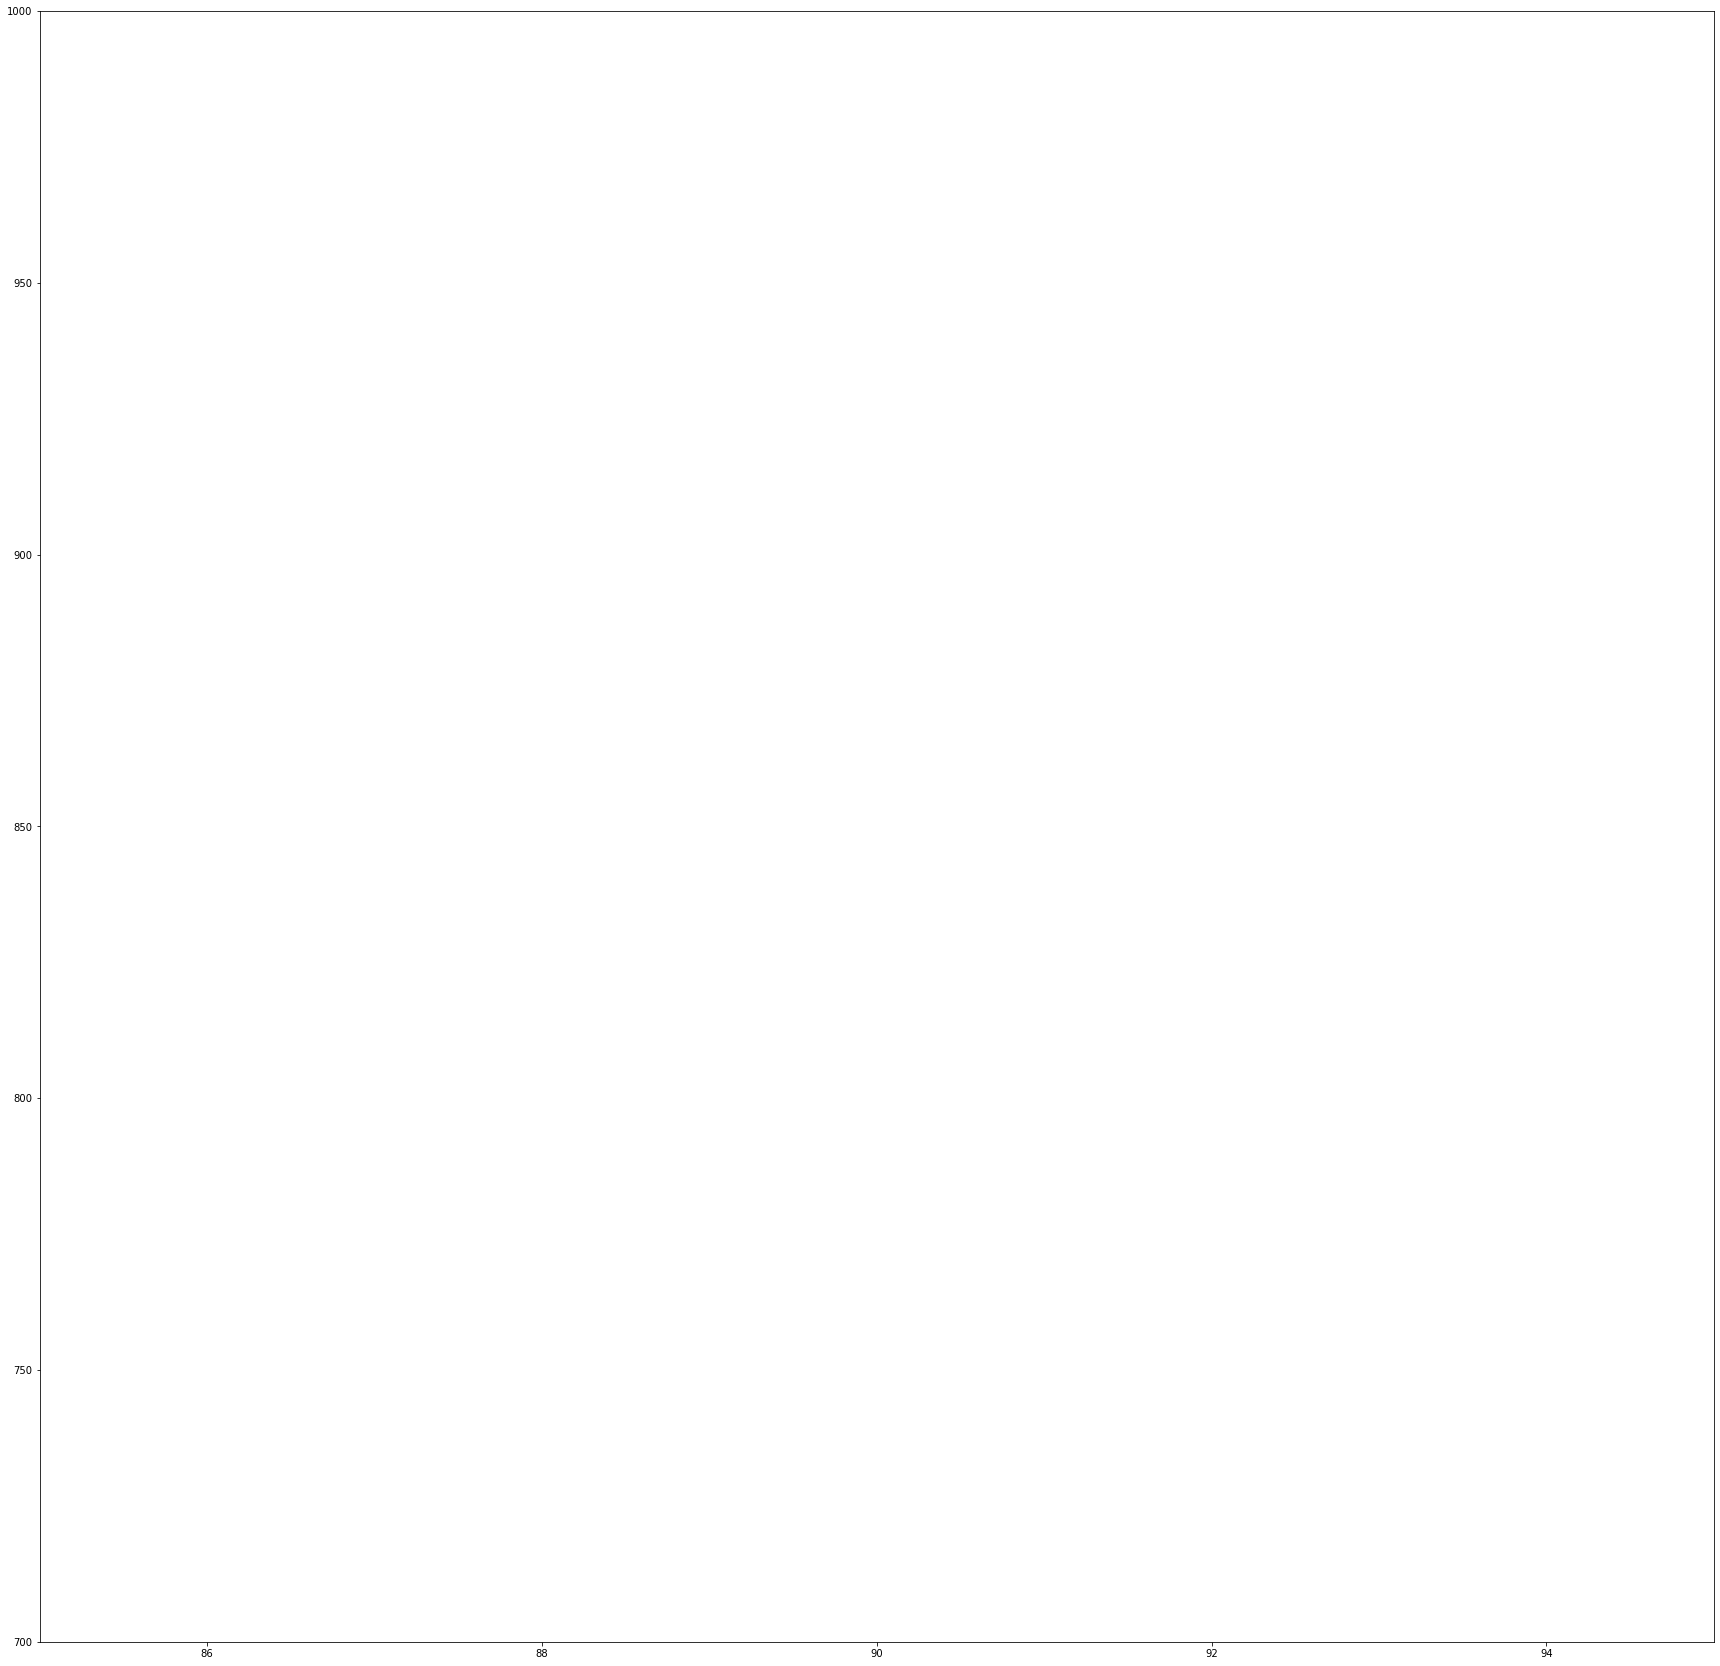

In [127]:
xs = np.arange(0, len(scores))
plt.figure(figsize= (30, 30))
sb.scatterplot(x = xs, y = scores)
plt.xlim(85,95)
plt.ylim(700,1000)
plt.show()

In [128]:
s2 = s2.loc[s2["No Rx"] == "0"]
s2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32319 entries, 0 to 32946
Data columns (total 43 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     32319 non-null  object        
 1   Time                     32319 non-null  object        
 2   VCC                      32319 non-null  int64         
 3   CHN                      32319 non-null  int64         
 4   Loop ID                  32319 non-null  int64         
 5   Veh ID                   32319 non-null  int64         
 6   Target Point             32319 non-null  int64         
 7   Commanded Direction      32319 non-null  object        
 8   Door Cmd                 32319 non-null  object        
 9   Max Vel                  32319 non-null  int64         
 10  Reply Type               32319 non-null  object        
 11  Active Passive           32319 non-null  object        
 12  Target Velocity          32319 n

In [129]:
s3 = s2.loc[s2["Veh ID"] == 117]
s3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22976 entries, 0 to 32944
Data columns (total 43 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     22976 non-null  object        
 1   Time                     22976 non-null  object        
 2   VCC                      22976 non-null  int64         
 3   CHN                      22976 non-null  int64         
 4   Loop ID                  22976 non-null  int64         
 5   Veh ID                   22976 non-null  int64         
 6   Target Point             22976 non-null  int64         
 7   Commanded Direction      22976 non-null  object        
 8   Door Cmd                 22976 non-null  object        
 9   Max Vel                  22976 non-null  int64         
 10  Reply Type               22976 non-null  object        
 11  Active Passive           22976 non-null  object        
 12  Target Velocity          22976 n

In [130]:
s3.datetime.value_counts()

19/03/05 10:59:39    4
19/03/05 12:05:52    3
19/03/05 12:34:58    3
19/03/05 13:04:41    3
19/03/05 11:18:14    3
                    ..
19/03/05 11:58:33    1
19/03/05 12:03:21    1
19/03/05 10:32:59    1
19/03/05 11:50:30    1
19/03/05 11:58:57    1
Name: datetime, Length: 9743, dtype: int64

In [131]:
s4 = s3.drop_duplicates()
s4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19483 entries, 0 to 32944
Data columns (total 43 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     19483 non-null  object        
 1   Time                     19483 non-null  object        
 2   VCC                      19483 non-null  int64         
 3   CHN                      19483 non-null  int64         
 4   Loop ID                  19483 non-null  int64         
 5   Veh ID                   19483 non-null  int64         
 6   Target Point             19483 non-null  int64         
 7   Commanded Direction      19483 non-null  object        
 8   Door Cmd                 19483 non-null  object        
 9   Max Vel                  19483 non-null  int64         
 10  Reply Type               19483 non-null  object        
 11  Active Passive           19483 non-null  object        
 12  Target Velocity          19483 n

In [132]:
s4.datetime.value_counts()

19/03/05 10:59:39    4
19/03/05 13:16:21    3
19/03/05 11:15:20    3
19/03/05 13:03:16    3
19/03/05 12:35:34    3
                    ..
19/03/05 12:13:23    1
19/03/05 11:25:44    1
19/03/05 12:00:27    1
19/03/05 12:39:33    1
19/03/05 12:13:03    1
Name: datetime, Length: 9743, dtype: int64

In [133]:
s5 = s4.drop_duplicates(subset = ["datetime"])
s5.datetime.value_counts()

19/03/05 12:05:52    1
19/03/05 12:42:20    1
19/03/05 12:20:52    1
19/03/05 12:42:23    1
19/03/05 12:23:10    1
                    ..
19/03/05 12:55:50    1
19/03/05 10:41:54    1
19/03/05 11:55:20    1
19/03/05 12:41:45    1
19/03/05 11:31:16    1
Name: datetime, Length: 9743, dtype: int64

In [134]:
s5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9743 entries, 0 to 32944
Data columns (total 43 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     9743 non-null   object        
 1   Time                     9743 non-null   object        
 2   VCC                      9743 non-null   int64         
 3   CHN                      9743 non-null   int64         
 4   Loop ID                  9743 non-null   int64         
 5   Veh ID                   9743 non-null   int64         
 6   Target Point             9743 non-null   int64         
 7   Commanded Direction      9743 non-null   object        
 8   Door Cmd                 9743 non-null   object        
 9   Max Vel                  9743 non-null   int64         
 10  Reply Type               9743 non-null   object        
 11  Active Passive           9743 non-null   object        
 12  Target Velocity          9743 non

In [135]:
train = df_lab.copy()
train["ndtime"] = train["ndtime"] + pd.Timedelta(value = 90, unit = "seconds")
tt = pd.merge(s3.loc[:,["Actual Velocity", "fixed", "Track Section", "b_vel"]], train, how = "outer", left_on = "fixed", right_on = "ndtime")
tt["score"] = (tt.gm_lab - tt.b_vel) ** 2
tt.score.sum()

17262.0

In [136]:
s2.head()

,Date,Time,VCC,CHN,Loop ID,Veh ID,Target Point,Commanded Direction,Door Cmd,Max Vel,...,Veh ID.1,Special Message,Previous Loop ID,Prev Entry Dir,No Rx,Track Section,GW Area,datetime,fixed,b_vel
0,19/03/05,10:31:11,2,2,7,117,430,GD1,Closed,25,...,NaN,NaN,NaN,NaN,0,0,~OMC I/B,19/03/05 10:31:11,2019-03-05 10:31:11,1
2,19/03/05,10:31:11,2,2,7,117,430,GD1,Closed,25,...,NaN,NaN,NaN,NaN,0,0,~OMC I/B,19/03/05 10:31:11,2019-03-05 10:31:11,1
4,19/03/05,10:31:12,2,2,7,117,430,GD1,Closed,25,...,NaN,NaN,NaN,NaN,0,0,~OMC I/B,19/03/05 10:31:12,2019-03-05 10:31:12,1
6,19/03/05,10:31:12,2,2,7,117,430,GD1,Closed,25,...,NaN,NaN,NaN,NaN,0,0,~OMC I/B,19/03/05 10:31:12,2019-03-05 10:31:12,1
7,19/03/05,10:31:12,2,2,7,117,430,GD1,Closed,25,...,NaN,NaN,NaN,NaN,0,0,~OMC I/B,19/03/05 10:31:12,2019-03-05 10:31:12,1


In [137]:
tt = tt.sort_values("ndtime")
tt.head()

,Actual Velocity,fixed,Track Section,b_vel,time,0_x,10_x,20_x,30_x,40_x,...,2540_y,2550_y,mean_acc_y,median_y,95_acc_y,max_acc_y,gm_lab,dtime,ndtime,score
22976,NaN,NaT,NaN,NaN,0,0.001609,0.000450,0.000286,0.000167,0.000151,...,0.000015,0.000028,0.006499,0.005735,0.014936,0.021827,0,1970-01-01 00:00:00,2019-03-05 10:05:28,NaN
22977,NaN,NaT,NaN,NaN,1000,0.001758,0.000274,0.000251,0.000161,0.000157,...,0.000014,0.000018,0.003935,0.003335,0.009474,0.018177,0,1970-01-01 00:00:01,2019-03-05 10:05:29,NaN
22978,NaN,NaT,NaN,NaN,2000,0.001389,0.000288,0.000171,0.000158,0.000107,...,0.000018,0.000016,0.005013,0.004526,0.011205,0.017957,0,1970-01-01 00:00:02,2019-03-05 10:05:30,NaN
22979,NaN,NaT,NaN,NaN,3000,0.001315,0.000237,0.000181,0.000144,0.000134,...,0.000017,0.000018,0.005484,0.004502,0.013789,0.021666,0,1970-01-01 00:00:03,2019-03-05 10:05:31,NaN
22980,NaN,NaT,NaN,NaN,4000,0.001686,0.000267,0.000198,0.000187,0.000127,...,0.000022,0.000018,0.007443,0.006522,0.018230,0.033521,0,1970-01-01 00:00:04,2019-03-05 10:05:32,NaN


In [138]:
nn_train = tt.drop(["fixed", "time", "gm_lab", "dtime", "ndtime", "b_vel", "score"], axis = 1)

In [139]:
nn_train.head()

,Actual Velocity,Track Section,0_x,10_x,20_x,30_x,40_x,50_x,60_x,70_x,...,2500_y,2510_y,2520_y,2530_y,2540_y,2550_y,mean_acc_y,median_y,95_acc_y,max_acc_y
22976,NaN,NaN,0.001609,0.000450,0.000286,0.000167,0.000151,0.000127,0.000106,0.000109,...,0.000021,0.000013,0.000014,0.000017,0.000015,0.000028,0.006499,0.005735,0.014936,0.021827
22977,NaN,NaN,0.001758,0.000274,0.000251,0.000161,0.000157,0.000120,0.000110,0.000095,...,0.000013,0.000017,0.000016,0.000022,0.000014,0.000018,0.003935,0.003335,0.009474,0.018177
22978,NaN,NaN,0.001389,0.000288,0.000171,0.000158,0.000107,0.000118,0.000092,0.000096,...,0.000017,0.000022,0.000015,0.000015,0.000018,0.000016,0.005013,0.004526,0.011205,0.017957
22979,NaN,NaN,0.001315,0.000237,0.000181,0.000144,0.000134,0.000138,0.000081,0.000129,...,0.000016,0.000018,0.000018,0.000022,0.000017,0.000018,0.005484,0.004502,0.013789,0.021666
22980,NaN,NaN,0.001686,0.000267,0.000198,0.000187,0.000127,0.000233,0.000238,0.000104,...,0.000018,0.000017,0.000016,0.000016,0.000022,0.000018,0.007443,0.006522,0.018230,0.033521


In [147]:
nn_t = nn_train.dropna()
nn_t.head(10)

,Actual Velocity,Track Section,0_x,10_x,20_x,30_x,40_x,50_x,60_x,70_x,...,2500_y,2510_y,2520_y,2530_y,2540_y,2550_y,mean_acc_y,median_y,95_acc_y,max_acc_y
0,24.0,0.0,0.002890,0.002176,0.004270,0.007065,0.009169,0.008229,0.006080,0.010589,...,0.001342,0.001679,0.001001,0.001741,0.001173,0.001034,0.441387,0.353673,1.135934,6.148501
1,24.0,0.0,0.002890,0.002176,0.004270,0.007065,0.009169,0.008229,0.006080,0.010589,...,0.001342,0.001679,0.001001,0.001741,0.001173,0.001034,0.441387,0.353673,1.135934,6.148501
3,25.0,0.0,0.006483,0.012145,0.016721,0.014323,0.019283,0.015196,0.018086,0.011794,...,0.001500,0.001161,0.001255,0.001117,0.000859,0.001176,0.435271,0.328850,1.205422,6.901017
4,25.0,0.0,0.006483,0.012145,0.016721,0.014323,0.019283,0.015196,0.018086,0.011794,...,0.001500,0.001161,0.001255,0.001117,0.000859,0.001176,0.435271,0.328850,1.205422,6.901017
2,25.0,0.0,0.006483,0.012145,0.016721,0.014323,0.019283,0.015196,0.018086,0.011794,...,0.001500,0.001161,0.001255,0.001117,0.000859,0.001176,0.435271,0.328850,1.205422,6.901017
5,25.0,2580.0,0.006075,0.026636,0.049570,0.035475,0.045464,0.058989,0.035533,0.054188,...,0.001636,0.000910,0.001677,0.001872,0.001693,0.001617,0.492657,0.398906,1.274077,2.885397
7,24.0,2580.0,0.006267,0.005948,0.009482,0.013067,0.011271,0.009465,0.012031,0.016119,...,0.001607,0.001065,0.001259,0.001687,0.001401,0.001769,0.452549,0.330364,1.290717,3.406660
6,25.0,2580.0,0.006267,0.005948,0.009482,0.013067,0.011271,0.009465,0.012031,0.016119,...,0.001607,0.001065,0.001259,0.001687,0.001401,0.001769,0.452549,0.330364,1.290717,3.406660
8,24.0,2580.0,0.006267,0.005948,0.009482,0.013067,0.011271,0.009465,0.012031,0.016119,...,0.001607,0.001065,0.001259,0.001687,0.001401,0.001769,0.452549,0.330364,1.290717,3.406660
9,24.0,2580.0,0.006176,0.005300,0.005865,0.007127,0.013677,0.011861,0.011872,0.017989,...,0.001176,0.001229,0.001405,0.001101,0.001418,0.001193,0.730326,0.607439,1.828327,3.858335


In [141]:
nn_train.shape

(24901, 522)

In [142]:
nn_t.shape

(22976, 522)

In [143]:
c1 = nn_t.drop_duplicates()
c1.shape

(16681, 522)

In [148]:
c1.head(10)

,Actual Velocity,Track Section,0_x,10_x,20_x,30_x,40_x,50_x,60_x,70_x,...,2500_y,2510_y,2520_y,2530_y,2540_y,2550_y,mean_acc_y,median_y,95_acc_y,max_acc_y
0,24.0,0.0,0.002890,0.002176,0.004270,0.007065,0.009169,0.008229,0.006080,0.010589,...,0.001342,0.001679,0.001001,0.001741,0.001173,0.001034,0.441387,0.353673,1.135934,6.148501
3,25.0,0.0,0.006483,0.012145,0.016721,0.014323,0.019283,0.015196,0.018086,0.011794,...,0.001500,0.001161,0.001255,0.001117,0.000859,0.001176,0.435271,0.328850,1.205422,6.901017
5,25.0,2580.0,0.006075,0.026636,0.049570,0.035475,0.045464,0.058989,0.035533,0.054188,...,0.001636,0.000910,0.001677,0.001872,0.001693,0.001617,0.492657,0.398906,1.274077,2.885397
7,24.0,2580.0,0.006267,0.005948,0.009482,0.013067,0.011271,0.009465,0.012031,0.016119,...,0.001607,0.001065,0.001259,0.001687,0.001401,0.001769,0.452549,0.330364,1.290717,3.406660
6,25.0,2580.0,0.006267,0.005948,0.009482,0.013067,0.011271,0.009465,0.012031,0.016119,...,0.001607,0.001065,0.001259,0.001687,0.001401,0.001769,0.452549,0.330364,1.290717,3.406660
9,24.0,2580.0,0.006176,0.005300,0.005865,0.007127,0.013677,0.011861,0.011872,0.017989,...,0.001176,0.001229,0.001405,0.001101,0.001418,0.001193,0.730326,0.607439,1.828327,3.858335
11,25.0,2580.0,0.001659,0.002093,0.005951,0.009888,0.013573,0.014407,0.018021,0.014798,...,0.001765,0.001471,0.001366,0.001166,0.001405,0.001772,0.780648,0.637179,2.027838,3.911854
12,24.0,2580.0,0.001659,0.002093,0.005951,0.009888,0.013573,0.014407,0.018021,0.014798,...,0.001765,0.001471,0.001366,0.001166,0.001405,0.001772,0.780648,0.637179,2.027838,3.911854
15,24.0,2580.0,0.002486,0.003253,0.006224,0.007712,0.009611,0.010210,0.015296,0.025284,...,0.001472,0.001624,0.001523,0.001350,0.001761,0.001668,1.339070,1.127215,3.261054,9.142879
13,25.0,2580.0,0.002486,0.003253,0.006224,0.007712,0.009611,0.010210,0.015296,0.025284,...,0.001472,0.001624,0.001523,0.001350,0.001761,0.001668,1.339070,1.127215,3.261054,9.142879


In [150]:
c2 = c1.drop_duplicates()
c2.shape[0]/3600

4.633611111111111

In [151]:
c2.to_csv("NN_training_big.nn")

In [ ]:
from __future__ import print_function
import torch
x = torch.rand(5, 3)
print(x)

In [ ]:
import torch
torch.cuda.is_available()

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
dtype = torch.float64
device = torch.device("cuda:0")
torch.manual_seed(42)


In [ ]:
nn_np = nn_t.iloc[:,1:].to_numpy()
nn_torch = torch.from_numpy(nn_np)
nn_target = torch.from_numpy(nn_t.iloc[:,0].to_numpy())

In [ ]:
nn_torch

In [ ]:
nn_target

In [ ]:
nn_torch.shape


In [ ]:
l_rate = 1e-8

input_dim, hiden_dim, h2, output_dim = 520, 500, 30, 1
model = torch.nn.Sequential(
    torch.nn.Linear(input_dim, hiden_dim),
    torch.nn.ReLU(),
    torch.nn.Linear(hiden_dim, h2),
    torch.nn.ReLU(),
    torch.nn.Linear(h2, output_dim),
)
model.cuda()
loss_fn = torch.nn.MSELoss(reduction="sum")

In [ ]:
nn_torch = nn_torch.float
nn_target = nn_target.float

In [ ]:
nn_torch.cuda()
nn_target.cuda()

In [ ]:
for t in range(500):
    y_pred = model(nn_torch).to(dev)
#     y_c_pred = y_pred.to(dev)
    loss = loss_fn(y_pred, nn_target)
    if t % 100 == 99:
        print(t, loss.item())
#     if t % 100 == 1:
#         print(t, loss.item())
    model.zero_grad()
    loss.backward()
    with torch.no_grad():
        for param in model.parameters():
            param -= l_rate * param.grad

In [ ]:
# for t in range(10):
#     h = nn_torch.mm(w1)
#     h_relu = h.clamp(min=0)
#     y_pred = h_relu.mm(w2)
#     print(y_pred.shape, nn_target.shape)
#     loss = (y_pred - nn_target).pow(2).sum().item()
#     if t % 100 == 99:
#         print(t, loss)
#     grad_y_pred = 2.0 * (y_pred - nn_target)
#     print(grad_y_pred.shape)
#     grad_w2 = h_relu.t().mm(grad_y_pred)
#     grad_h_relu = grad_y_pred.mm(w2.t())
#     grad_h = gard_h_relu.clone()
#     grad_h[h < 0] = 0
#     grad_w1 = nn_torch.t().mm(grad_h)
    
#     w1 -= l_rate * grad_w1
#     w2 -= l_rate * grad_w2
    